<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# To calculate class weights for inbalanced data
from sklearn.utils.class_weight import compute_class_weight

# To help with model building
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,InputLayer

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE

import time
import random

## Loading the dataset

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
churn=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural networks/Churn.csv')

In [ ]:
data=churn.copy()

## Data Overview

In [ ]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
print("The dataset contains {} rows and {} columns".format(data.shape[0],data.shape[1]))

The dataset contains 10000 rows and 14 columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.duplicated().sum()

0

* there are no duplicate or missing values in the dataset

In [ ]:
data.describe(include='all').T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0

* 'RowNumber', 'CustomerID' and 'Surname' will be useless for our analysis, we will drop those rows

In [ ]:
data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

## Exploratory Data Analysis

### Functions to help with EDA

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        #palette="Paired",
        legend=False,
        #order=data[feature].value_counts().index[:n].sort_values(),
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentages displayed on the columns.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Crosstab for count
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Crosstab for normalized (percentage)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot stacked bar chart
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))

    # Add percentages on the columns
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0%}', (x + width / 2, y + height / 2), ha='center', va='center')

    plt.xticks(rotation=0)

    plt.legend(
        loc="upper left", bbox_to_anchor=(1, 1),
    )
    plt.show()

In [ ]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target, hist_stat="density", hist_xticks=None, boxplot_yticks=None):
    """
    hist_xticks: set a number if more granular xticks for histograms are needed
    boxplot_yticks: set a number if more granular yticks for boxplots are needed
    hist_stat: stat for histogram - 'density' or 'frequency'
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of " + target+" for target "+ str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat=hist_stat,
    )
    if hist_xticks != None:
      axs[0,0].set_xticks(np.arange(data[predictor].min(), data[predictor].max() + 1, hist_xticks))  # Increase the number of x-ticks

    axs[0, 1].set_title("Distribution of "+target+" for target " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat=hist_stat,
    )
    if hist_xticks != None:
        axs[0,1].set_xticks(np.arange(data[predictor].min(), data[predictor].max() + 1, hist_xticks))  # Increase the number of x-ticks

    axs[1, 0].set_title("Boxplot w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], hue=target, legend=False)
    if boxplot_yticks != None:
      axs[1,0].set_yticks(np.arange(data[predictor].min(), data[predictor].max() + 1, boxplot_yticks))   # Increase the number of y-ticks

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t "+target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, hue=target, legend=False)
    if boxplot_yticks != None:
      axs[1,1].set_yticks(np.arange(data[predictor].min(), data[predictor].max() + 1, boxplot_yticks))   # Increase the number of y-ticks

    plt.tight_layout()
    plt.show()

In [ ]:
hist_cols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
cat_cols=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Univariate Analysis

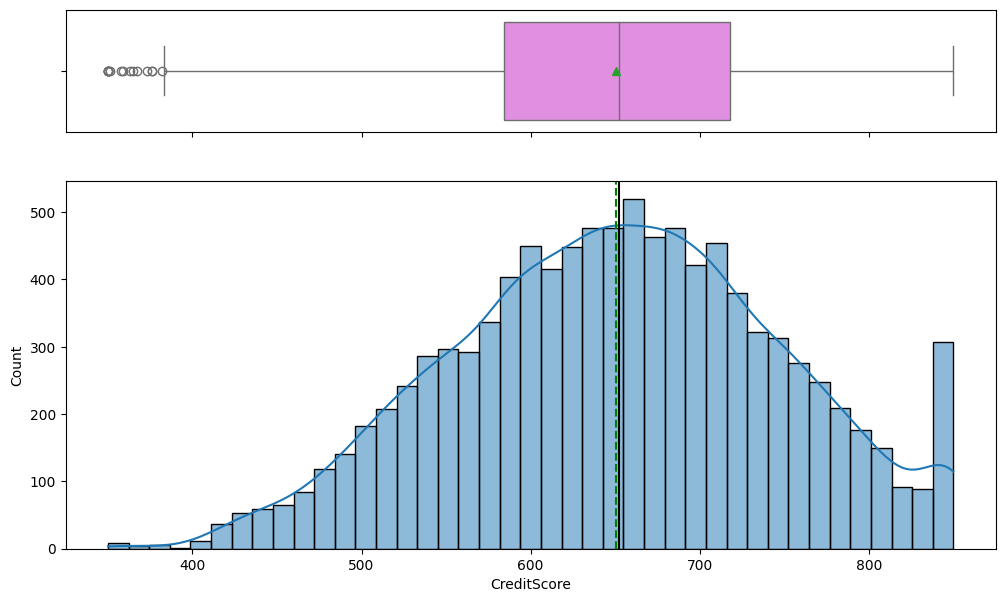

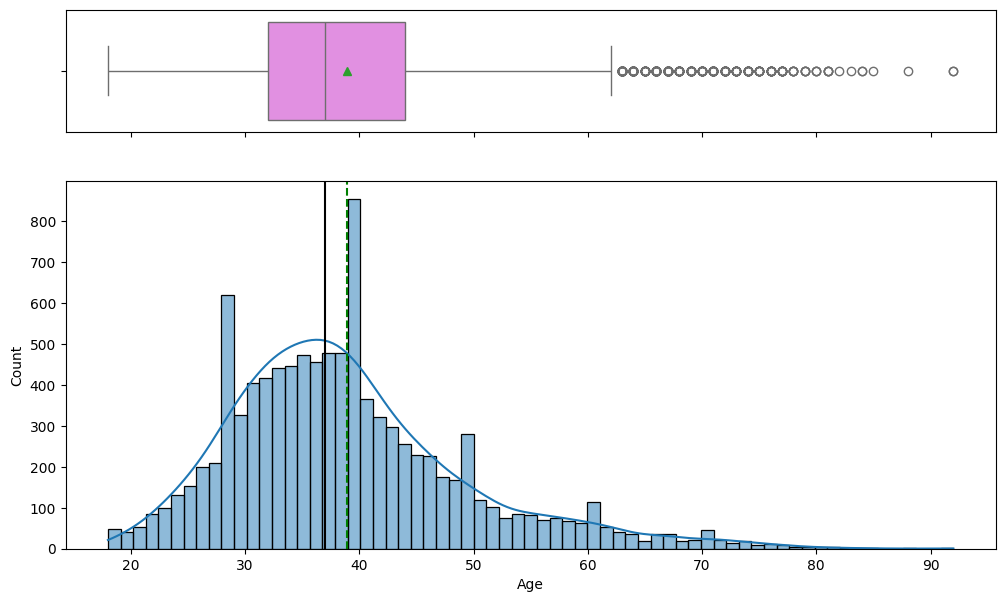

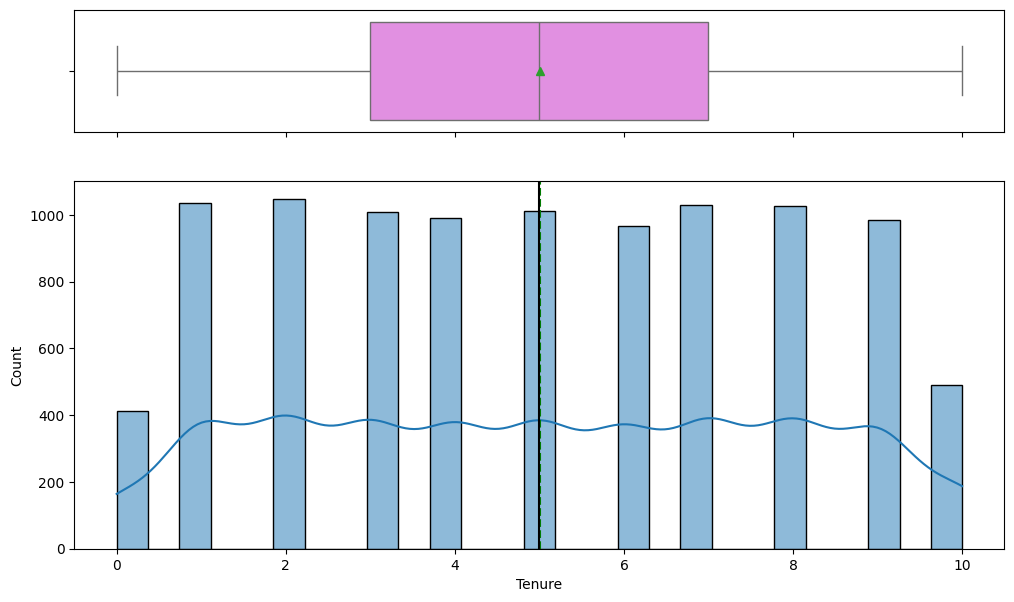

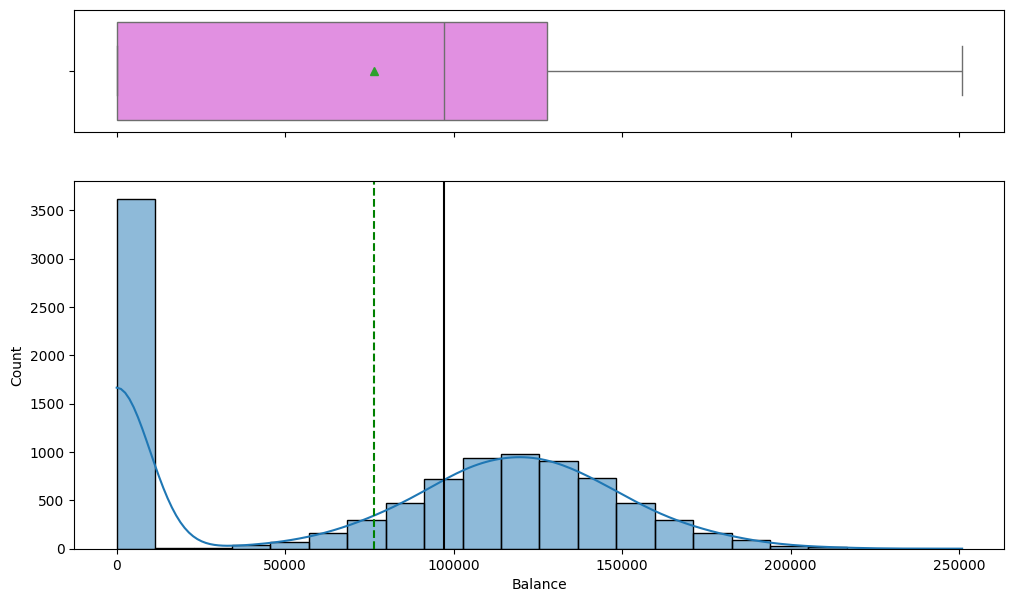

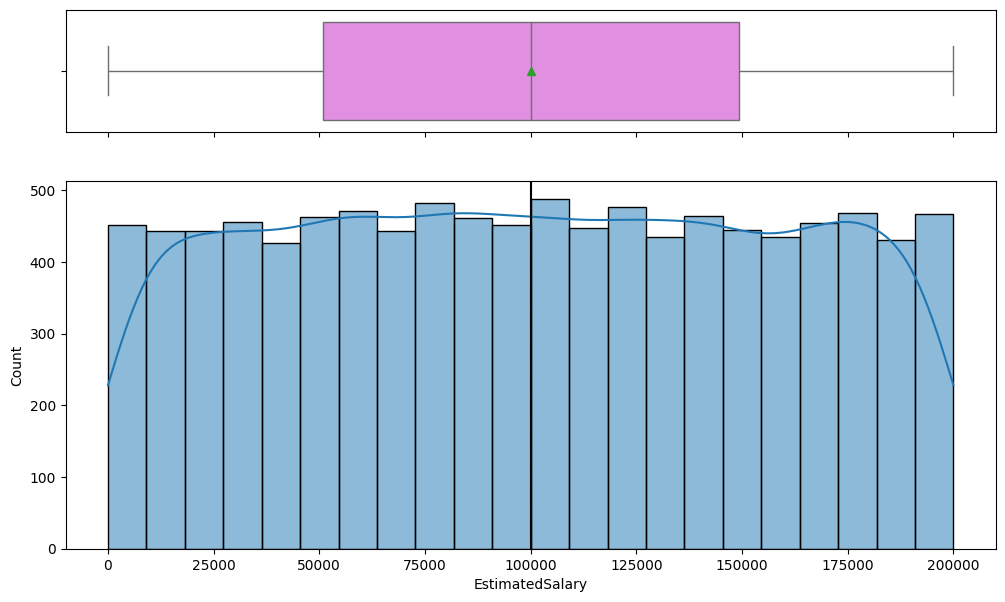

In [ ]:
for col in hist_cols:
  histogram_boxplot(data, col, kde=True)

In [ ]:
data[data['Balance']==0].Balance.count()/data.Balance.count()*100

36.17

* CreditScore is normally distributed
* Age is slightly right-skewed with some older outliers
* Tenure is normally distributed
* Balance is left-skewed, 36% of clients have zero Balance
* Estimated Salary is normally distributed

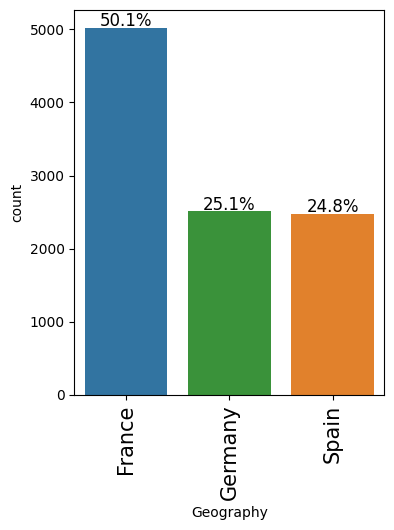

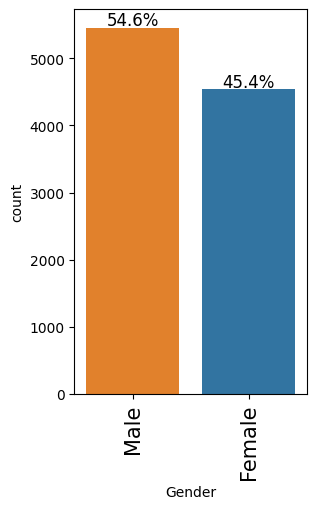

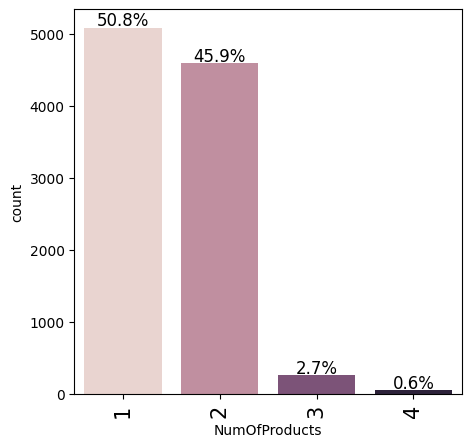

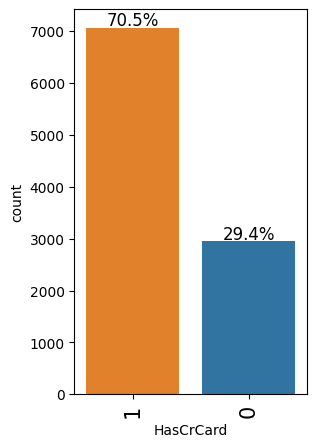

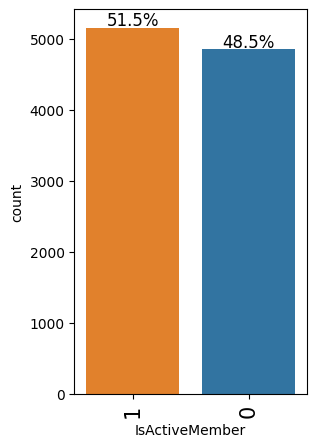

In [ ]:
for col in cat_cols:
  labeled_barplot(data, col, perc=True)

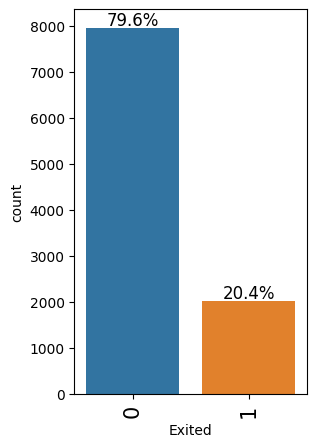

In [ ]:
labeled_barplot(data,'Exited',perc=True)

* 50% of clients are from France, 25% from Germany and 25% from Spain
* There are more males than females in the dataset (54.6% vs 45.4%)
* 51% of clients only have 1 product with the bank, 46% have 2 products. Very little clients have 3 or 4 products
* 70.5% of clients have a credit card
* 51.5% of clients are active with the bank
* only 20% of the clients churned

### Bivariate Analysis

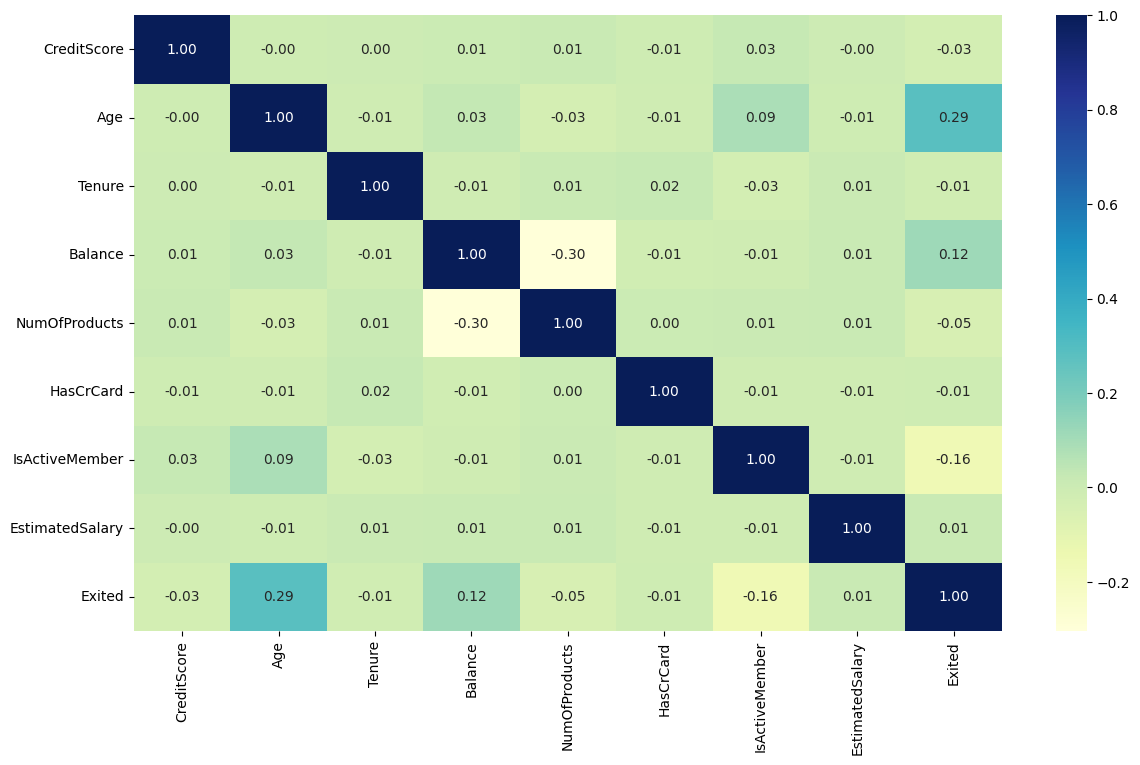

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only=True),fmt=".2f",annot=True,cmap="YlGnBu")
plt.show()

* Age is somewhat correlated with whether the client churns or not
* Number of products the client holds with the bank is somewhat negatively correlated with Balance
* There is a very slight correlation between the client actively interacting with the bank and churn

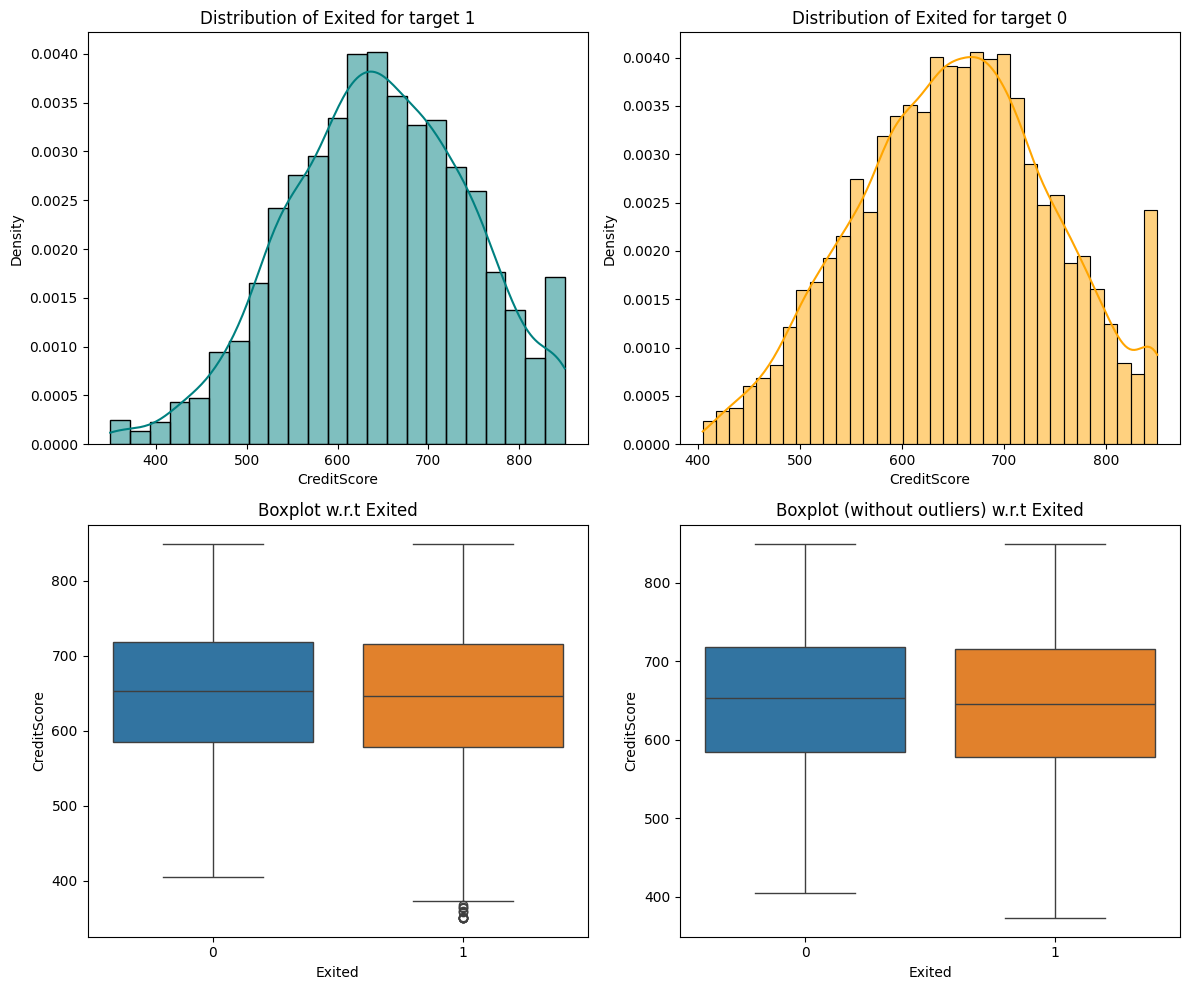

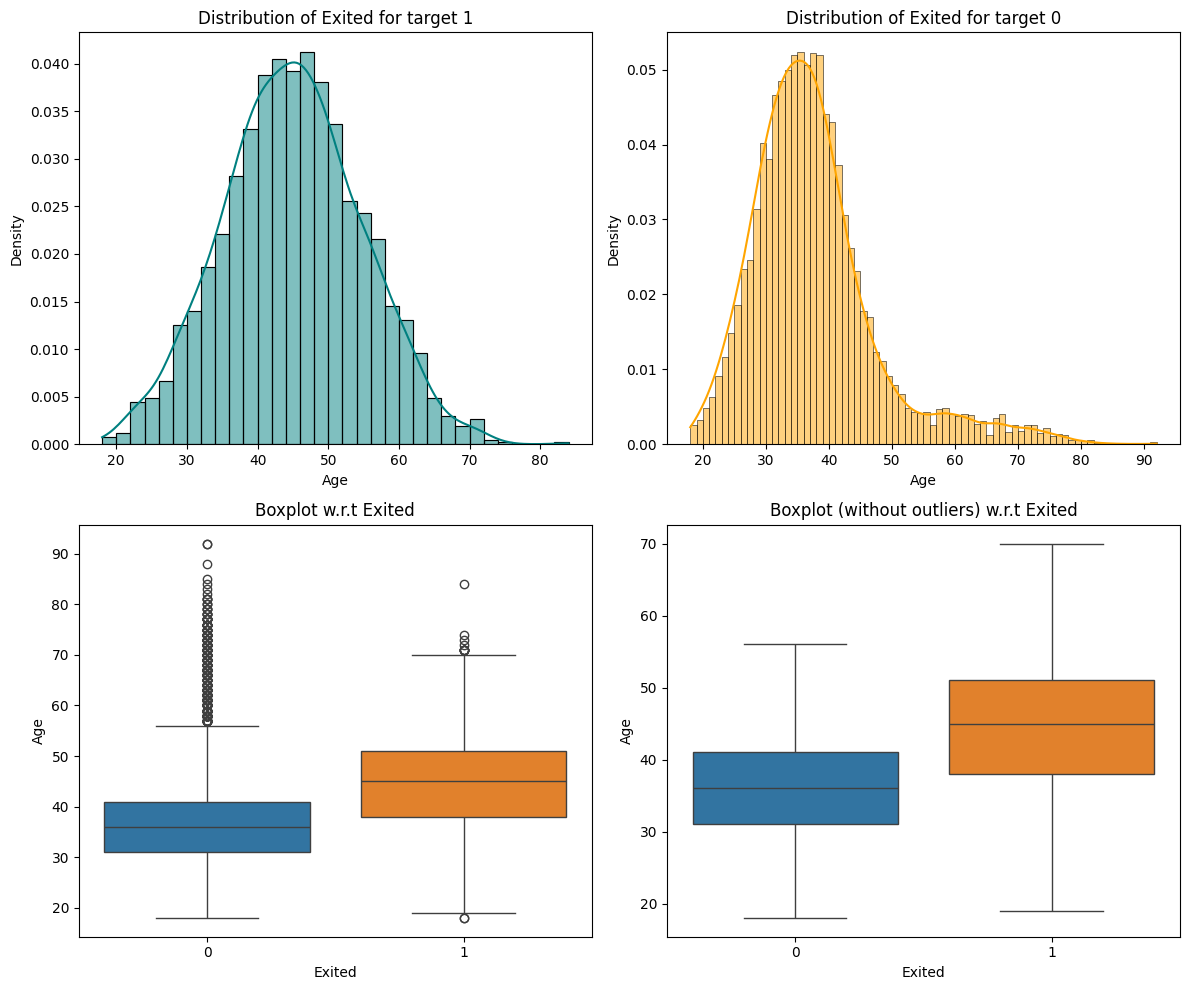

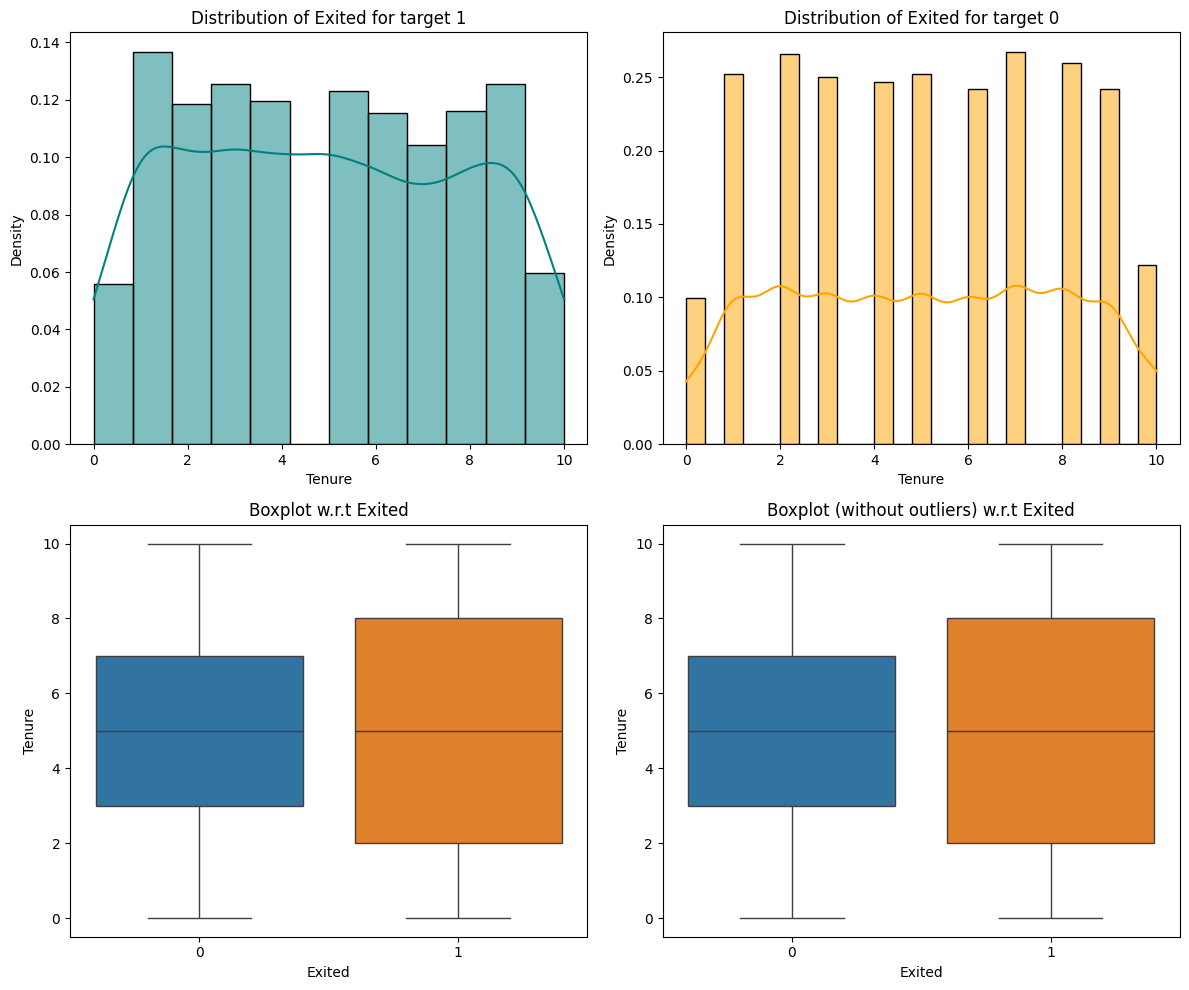

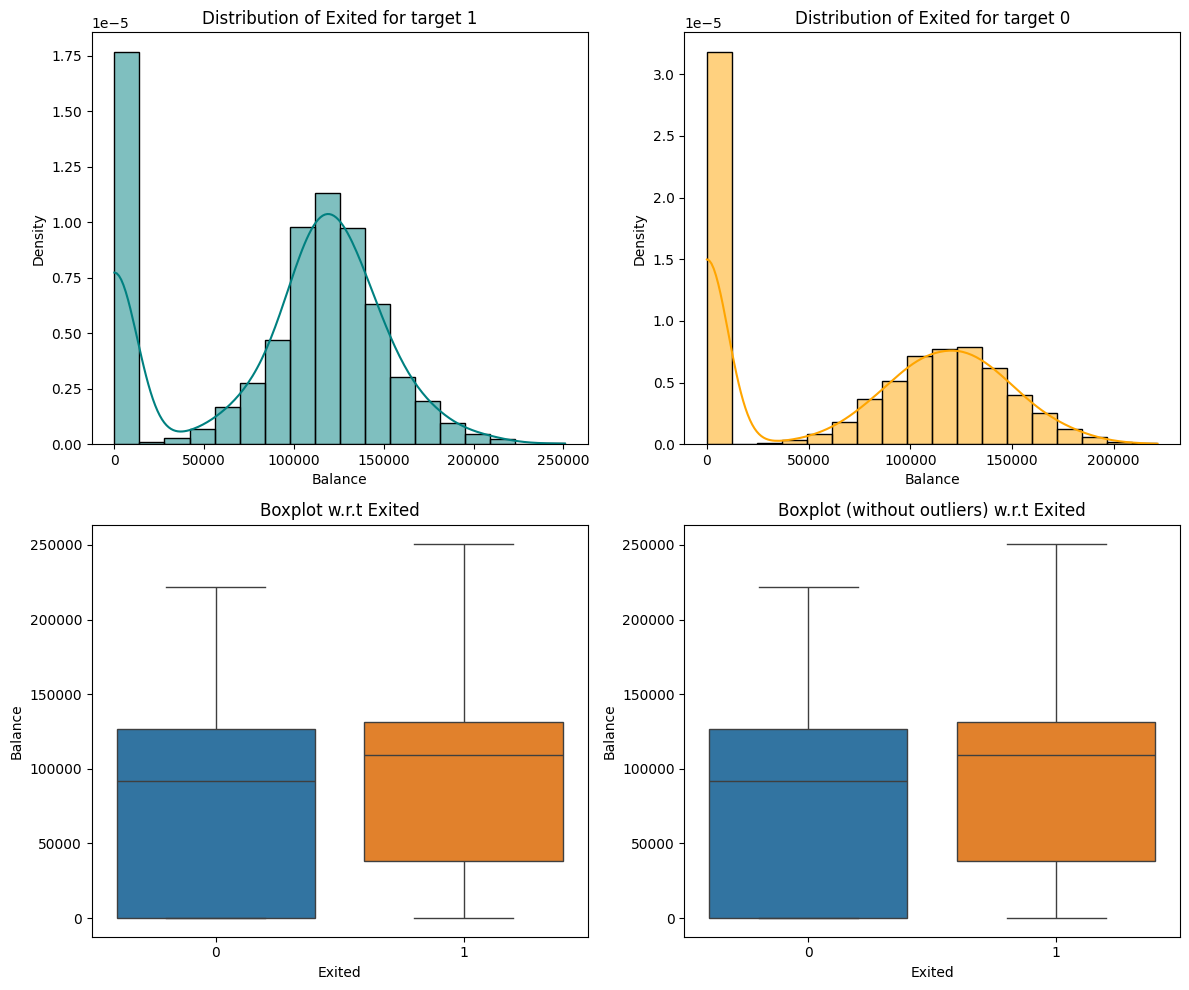

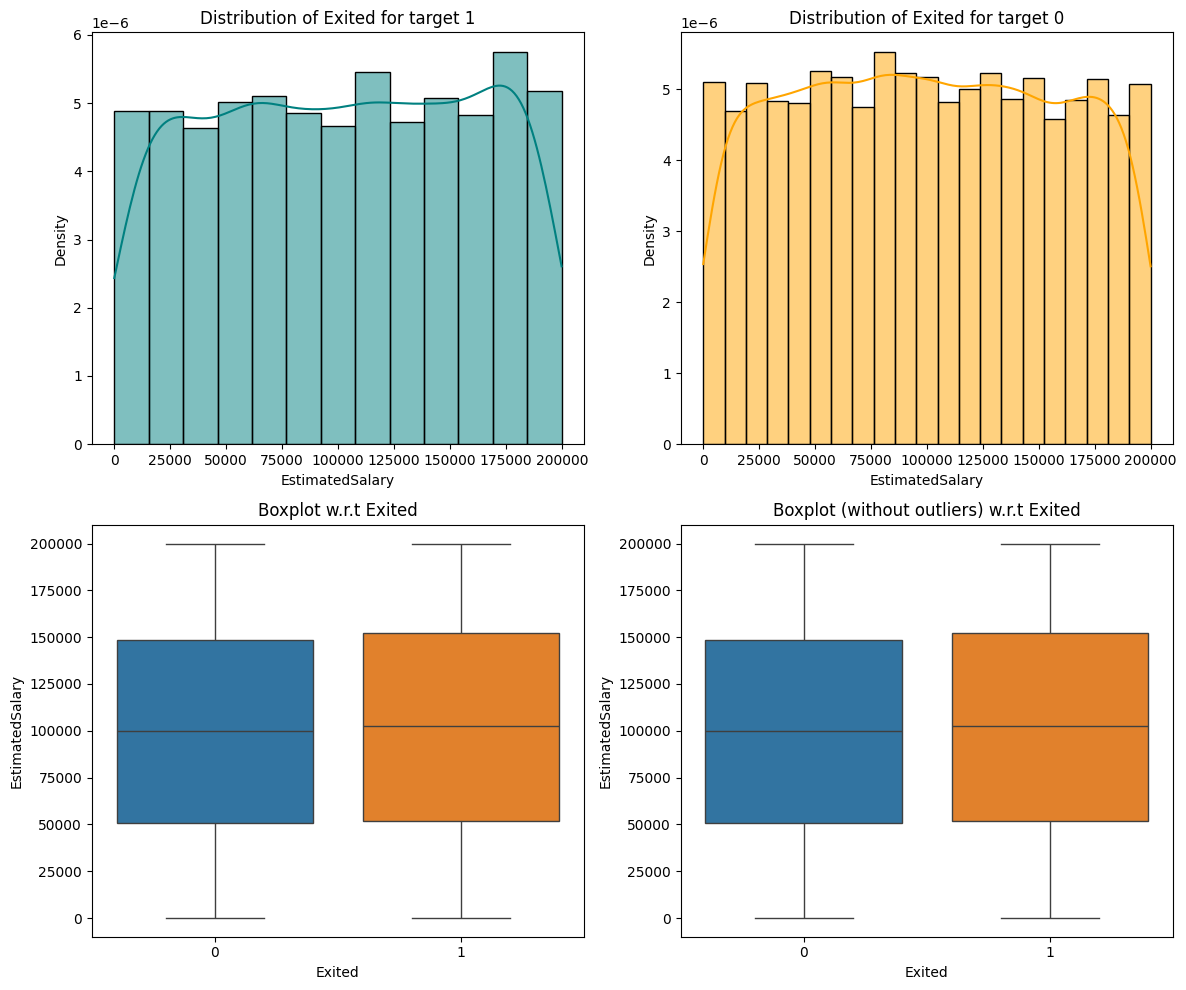

In [ ]:
for col in hist_cols:
  distribution_plot_wrt_target(data, col, 'Exited')

In [ ]:
data[data['Exited']==1].describe().T

count           mean           std     min       25%  \
CreditScore      2037.0     645.351497    100.321503  350.00    578.00   
Age              2037.0      44.837997      9.761562   18.00     38.00   
Tenure           2037.0       4.932744      2.936106    0.00      2.00   
Balance          2037.0   91108.539337  58360.794816    0.00  38340.02   
NumOfProducts    2037.0       1.475209      0.801521    1.00      1.00   
HasCrCard        2037.0       0.699067      0.458776    0.00      0.00   
IsActiveMember   2037.0       0.360825      0.480358    0.00      0.00   
EstimatedSalary  2037.0  101465.677531  57912.418071   11.58  51907.72   
Exited           2037.0       1.000000      0.000000    1.00      1.00   

                       50%        75%        max  
CreditScore         646.00     716.00     850.00  
Age                  45.00      51.00      84.00  
Tenure                5.00       8.00      10.00  
Balance          109349.29  131433.33  250898.09  
NumOfProducts         1.00       2.00       4.00  
HasCrCard             1.00       1.00       1.00  
IsActiveMember        0.00       1.00       1.00  
EstimatedSalary  102460.84  152422.91  199808.10  
Exited                1.00       1.00       1.00

* Credit score doesn't appear to significantly affect whether the client churns or not
* Clients who are churning appear to be older (75% of clients who churned were older than 38)
* 50% of clients who churned were with the bank between 2 and 8 years
* Churned clients had higher Balance
* There is no difference in Estimated Salary between clients who churned and who stayed

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


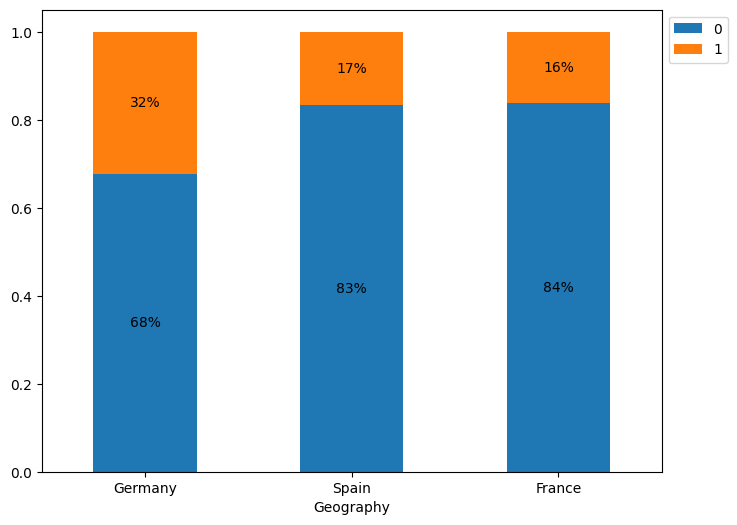

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


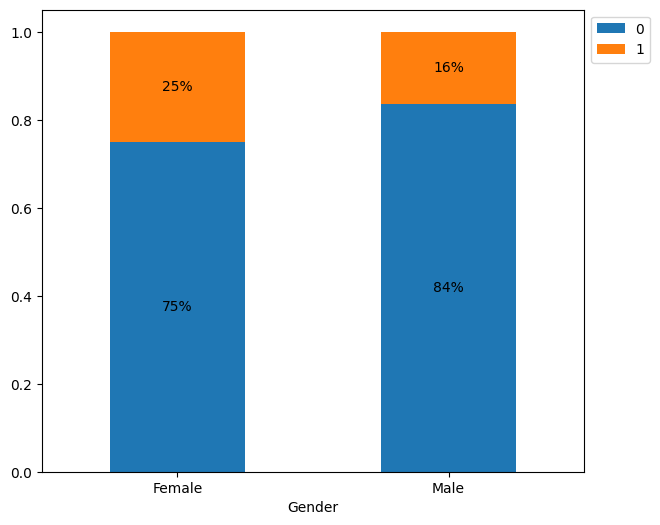

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


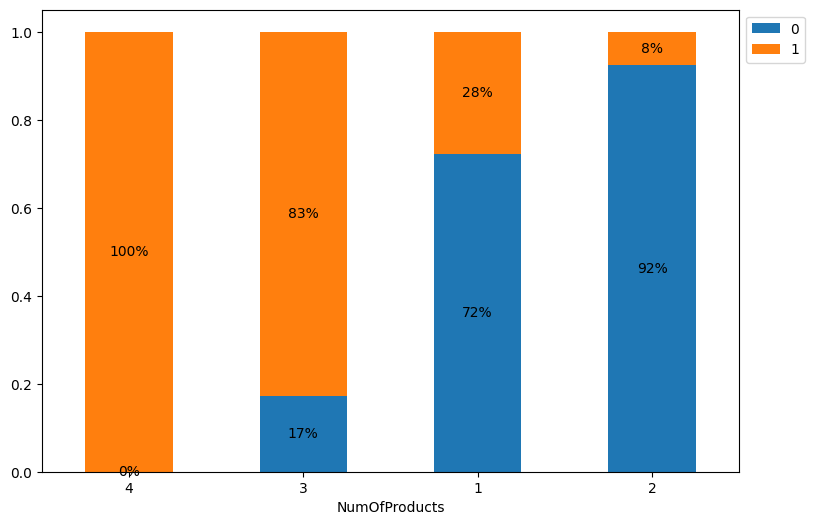

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


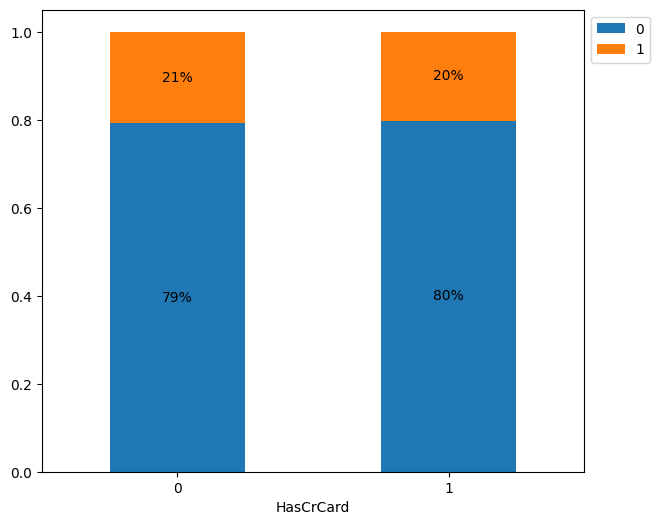

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


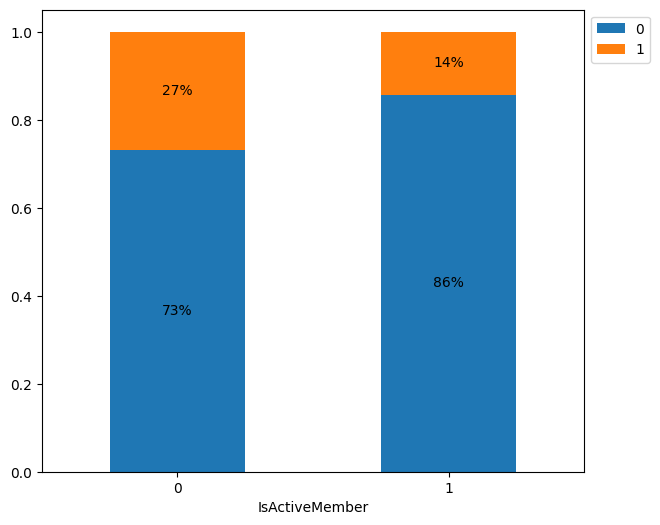

In [ ]:
for col in cat_cols:
  if col!='Exited':
    stacked_barplot(data, col, 'Exited')

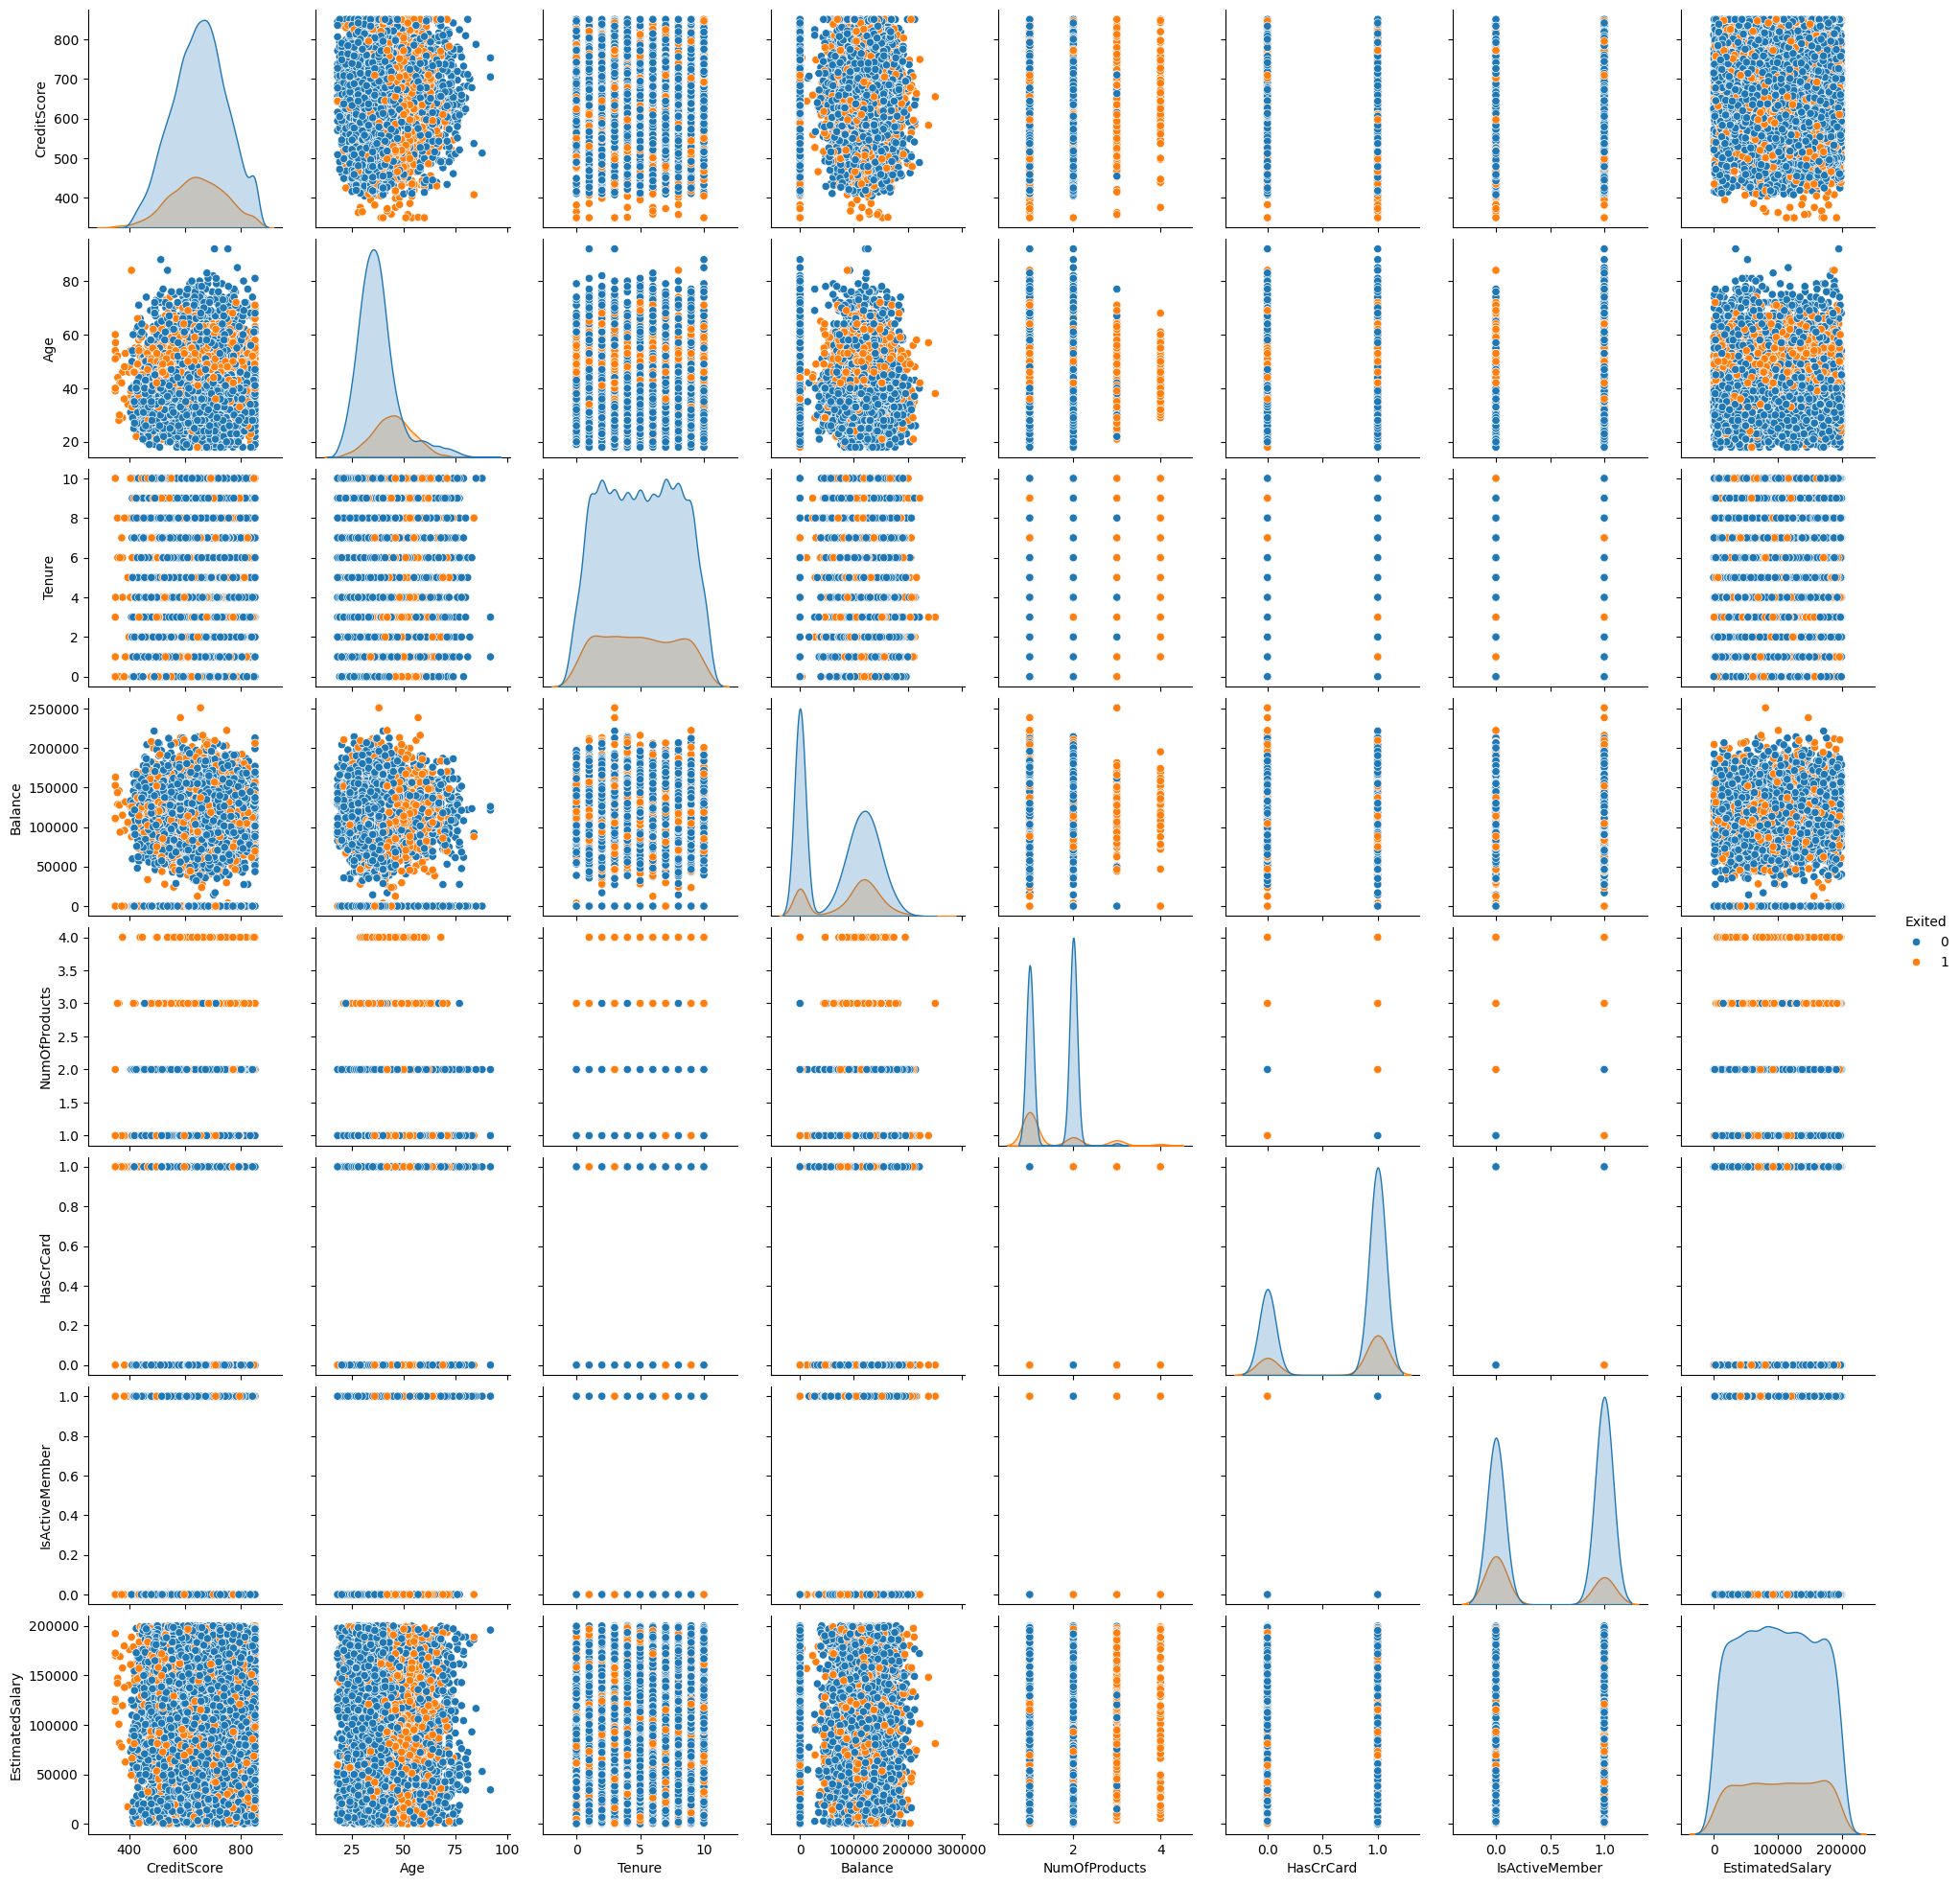

In [ ]:
sns.pairplot(data=data, hue="Exited")
plt.show()

* 32% of clients from Germany have churned, while among spanish and french - 17% and 16%
* 25% of female clients have churned, while in the male category only 16%
* Strangely, out of clients who had 3 and 4 products with the bank - 83% and 100% have churned, but the overall number of such clients was not very high. Clients with 2 products have churned less than those holding only 1 product with the bank (8% vs 28%)
* Churn rate isn't affected by the client having a credit card or not
* Clients who are an active member of the bank churn less (14% vs 27%)

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
data=pd.get_dummies(data, columns=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember'],drop_first=True,dtype=float)

### Train-validation-test Split

In [ ]:
X=data.drop(['Exited'],axis=1)
y=data['Exited']

In [ ]:
# splitting the data in 80:20 ratio for train and temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,random_state=2,stratify=y)
# splitting the temporary data in 50:50 ratio for validation and test data
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=2,stratify=y_temp)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 8000
Number of rows in validation data = 1000
Number of rows in test data = 1000


### Data Normalization

In [ ]:
# Define the columns to scale
to_scale = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the X_train data
scaler.fit(X_train[to_scale])

StandardScaler()

In [ ]:
# Transform selected columns in X_train, X_val, and X_test using the fitted scaler

X_train[to_scale] = scaler.transform(X_train[to_scale])
X_val[to_scale] = scaler.transform(X_val[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

The wrong predictions of the model can be:

* Predicting a client will churn and the client doesn't churn
* Predicting a client will not churn and the client churns

The second case is more important - churning clients means lost money.

So we need to minimize False Negatives - which means we need to maximize Recall.



###Utility functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = np.round(model.predict(predictors))

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_metrics_classification(model, X_train, y_train, X_val, y_val):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    X_train, y_train - training dataset
    X_val, y_val - validation dataset
    """

    # predicting using the independent variables
    pred_train = np.round(model.predict(X_train))
    pred_val = np.round(model.predict(X_val))

    #compute metrics for training set
    acc_train = accuracy_score(y_train, pred_train)  # to compute Accuracy
    recall_train = recall_score(y_train, pred_train)  # to compute Recall
    precision_train = precision_score(y_train, pred_train)  # to compute Precision
    f1_train = f1_score(y_train, pred_train)  # to compute F1-score

    #compute metrics for validation set
    acc_val = accuracy_score(y_val, pred_val)  # to compute Accuracy
    recall_val = recall_score(y_val, pred_val)  # to compute Recall
    precision_val = precision_score(y_val, pred_val)  # to compute Precision
    f1_val = f1_score(y_val, pred_val)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc_train,acc_val],
            "Recall": [recall_train,recall_val],
            "Precision": [precision_train,precision_val],
            "F1": [f1_train,f1_val]

        },
        index=["Training data", "Validation data"]
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = np.round(model.predict(predictors))
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def confusion_matrix_train_val(model, X_train, y_train, X_val, y_val):
    """
    To plot the confusion_matrix with percentages for both training and validation data side by side.

    model: classifier
    X_train: training independent variables
    y_train: training dependent variable
    X_val: validation independent variables
    y_val: validation dependent variable
    """
    # Predict for training and validation data
    y_pred_train = np.round(model.predict(X_train))
    y_pred_val = np.round(model.predict(X_val))

    # Confusion matrix for training data
    cm_train = confusion_matrix(y_train, y_pred_train)
    labels_train = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_train.flatten().sum())]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

    # Confusion matrix for validation data
    cm_val = confusion_matrix(y_val, y_pred_val)
    labels_val = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_val.flatten().sum())]
            for item in cm_val.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrices side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Training data heatmap
    sns.heatmap(cm_train, annot=labels_train, fmt="", ax=axes[0], cmap="Blues")
    axes[0].set_title('Training Data')
    axes[0].set_ylabel("True label")
    axes[0].set_xlabel("Predicted label")

    # Validation data heatmap
    sns.heatmap(cm_val, annot=labels_val, fmt="", ax=axes[1], cmap="Blues")
    axes[1].set_title('Validation Data')
    axes[1].set_ylabel("True label")
    axes[1].set_xlabel("Predicted label")

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_metrics(history):
    """
    Function to plot Loss and Recall side by side.
    history: an object which stores the metrics and losses.
    """
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # Creating a subplot with 1 row, 2 columns

    # Plotting Loss
    ax[0].plot(history.history['loss'])  # Plotting the train loss
    ax[0].plot(history.history['val_loss'])  # Plotting the validation loss
    ax[0].set_title('Model Loss')  # Title for Loss subplot
    ax[0].set_xticks(range(0,len(history.history['loss'])+1,5))
    ax[0].set_ylabel('Loss')  # Y-axis label
    ax[0].set_xlabel('Epoch')  # X-axis label
    ax[0].legend(['Train', 'Validation'], loc='upper right')  # Legend for Loss subplot

    # Plotting Recall
    ax[1].plot(history.history['recall'])  # Plotting the train recall
    ax[1].plot(history.history['val_recall'])  # Plotting the validation recall
    ax[1].set_title('Model Recall')  # Title for Recall subplot
    ax[1].set_xticks(range(0,len(history.history['loss'])+1,5))
    ax[1].set_ylabel('Recall')  # Y-axis label
    ax[1].set_xlabel('Epoch')  # X-axis label
    ax[1].legend(['Train', 'Validation'], loc='lower right')  # Legend for Recall subplot

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage
# plot_metrics(history)

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","regularization","Balanced data","Weights Initialization","train loss","validation loss","train recall","validation recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

###Balancing the classes

In [ ]:
classes = np.unique(y_train)

# Compute class weights using sklearn utility
cw = compute_class_weight('balanced', classes=classes, y=y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {classes[i]: cw[i] for i in range(len(classes))}

print("Class weights dictionary:", cw_dict)

Class weights dictionary: {0: 0.6279434850863422, 1: 2.4539877300613497}


In [ ]:
y_train = np.expand_dims(y_train, axis=-1)

### Neural Network with SGD Optimizer

In [ ]:
batch_size = 32
epochs = 50

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(InputLayer(shape=(X_train.shape[1],)))
model_1.add(Dense(64,activation="relu",kernel_initializer="he_normal"))
model_1.add(Dense(16,activation="relu",kernel_initializer="he_normal"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])

In [ ]:
start = time.time()
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs, class_weight=cw_dict)

end=time.time()

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6615 - recall: 0.6460 - val_loss: 0.6284 - val_recall: 0.6029
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6059 - recall: 0.7038 - val_loss: 0.5881 - val_recall: 0.6667
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5795 - recall: 0.7102 - val_loss: 0.5629 - val_recall: 0.6912
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5603 - recall: 0.7419 - val_loss: 0.5483 - val_recall: 0.7304
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5461 - recall: 0.7607 - val_loss: 0.5386 - val_recall: 0.7696
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5353 - recall: 0.7645 - val_loss: 0.5312 - val_recall: 0.7647
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5271 - recall: 0.7716 - val_loss: 0.5272 - val_recall: 0.7647
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5208 - recall: 0.7738 - val_loss: 0.5250 - val_recall: 0.7549
Epoch 9/

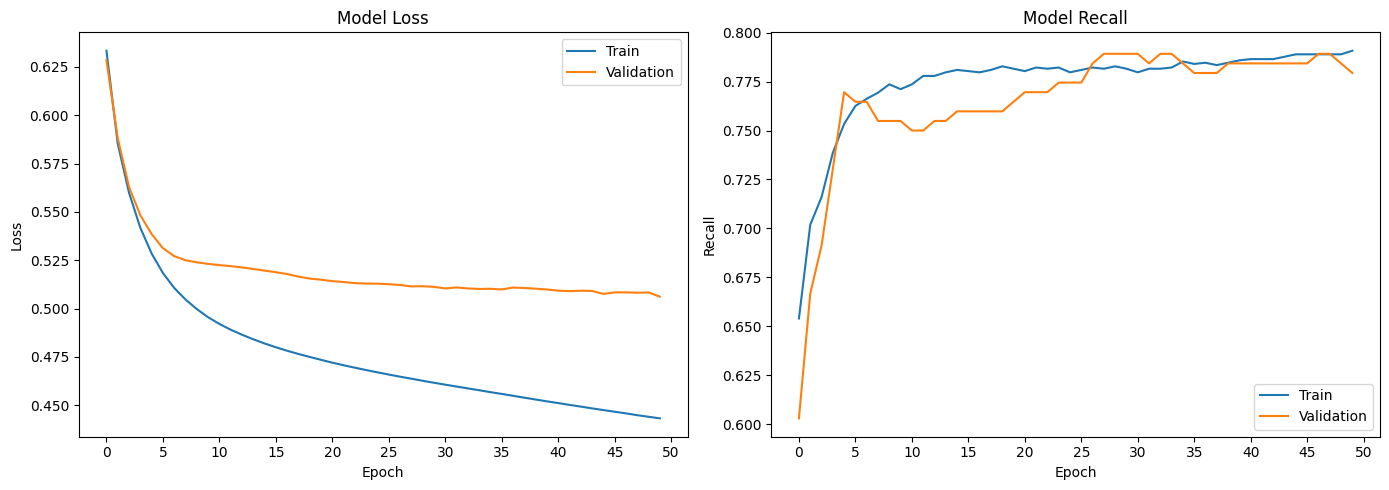

In [ ]:
plot_metrics(history_1)

In [ ]:
model1_perf=model_metrics_classification(model_1,X_train,y_train,X_val,y_val)
model1_perf

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision        F1
Training data    0.775375  0.822699   0.470691  0.598794
Validation data  0.761000  0.779412   0.450425  0.570916

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


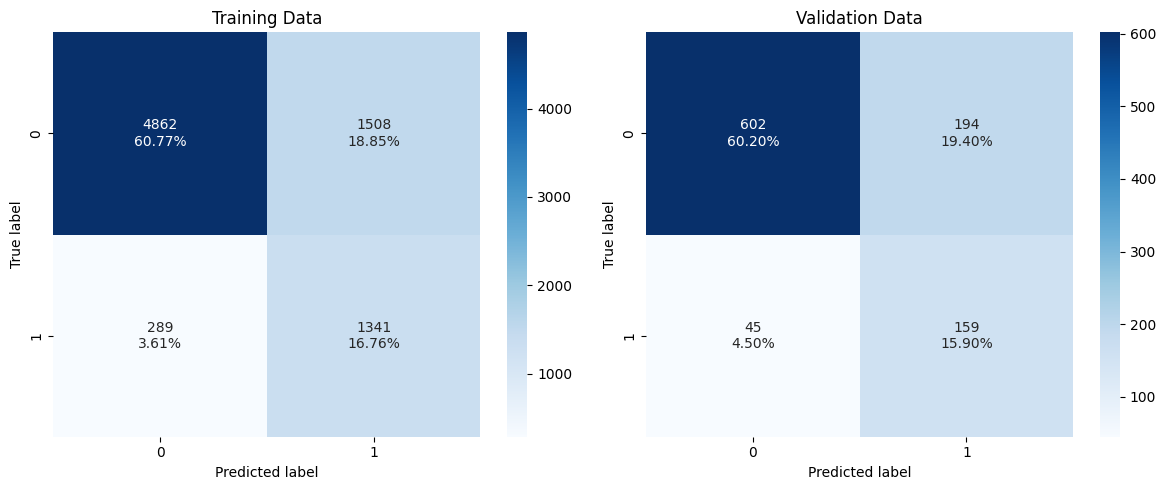

In [ ]:
# confusion matrices
confusion_matrix_train_val(model_1,X_train,y_train,X_val,y_val)

In [ ]:
results.loc[0] = [2,[64,16],["relu","relu"],50,32,"SGD","-","Class Weights","HE",history_1.history["loss"][-1],history_1.history["val_loss"][-1],history_1.history["recall"][-1],history_1.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 16]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]        50          32       SGD   

  regularization  Balanced data Weights Initialization  train loss  \
0              -  Class Weights                     HE    0.443268   

   validation loss  train recall  validation recall  time (secs)  
0         0.506172      0.790798           0.779412        35.44

* validation and training recall are pretty close together
* there is a steep decrease in loss from 1 to 5 epochs

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(InputLayer(shape=(X_train.shape[1],)))
model_2.add(Dense(64,activation="relu",kernel_initializer="he_normal"))
model_2.add(Dense(16,activation="relu",kernel_initializer="he_normal"))
model_2.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = optimizers.Adam()    # defining Adam as the optimizer to be used
model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])

In [ ]:
start = time.time()
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6144 - recall: 0.6938 - val_loss: 0.5435 - val_recall: 0.7549
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5200 - recall: 0.7593 - val_loss: 0.5190 - val_recall: 0.7451
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4984 - recall: 0.7619 - val_loss: 0.5152 - val_recall: 0.7500
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4870 - recall: 0.7605 - val_loss: 0.5128 - val_recall: 0.7500
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4794 - recall: 0.7646 - val_loss: 0.5102 - val_recall: 0.7549
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4736 - recall: 0.7639 - val_loss: 0.5069 - val_recall: 0.7451
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4686 - recall: 0.7668 - val_loss: 0.5044 - val_recall: 0.7451
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4643 - recall: 0.7652 - val_loss: 0.5033 - val_recall: 0.7402
Epoch 9/

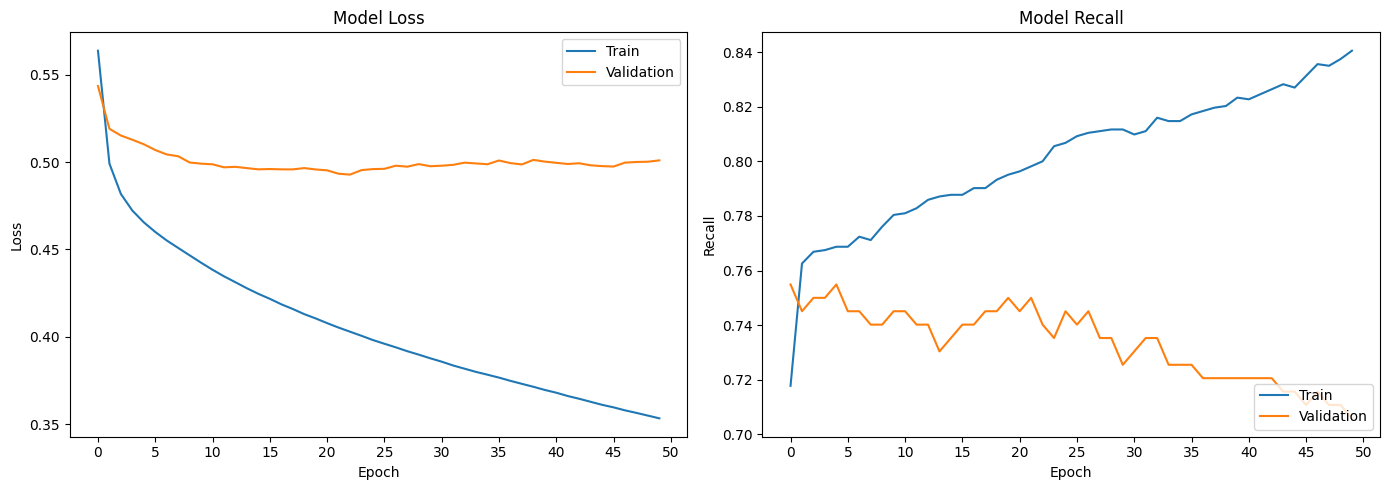

In [ ]:
plot_metrics(history_2)

In [ ]:
model2_perf=model_metrics_classification(model_2,X_train,y_train,X_val,y_val)
model2_perf

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy    Recall  Precision        F1
Training data    0.841375  0.871166   0.572812  0.691166
Validation data  0.768000  0.705882   0.455696  0.553846

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


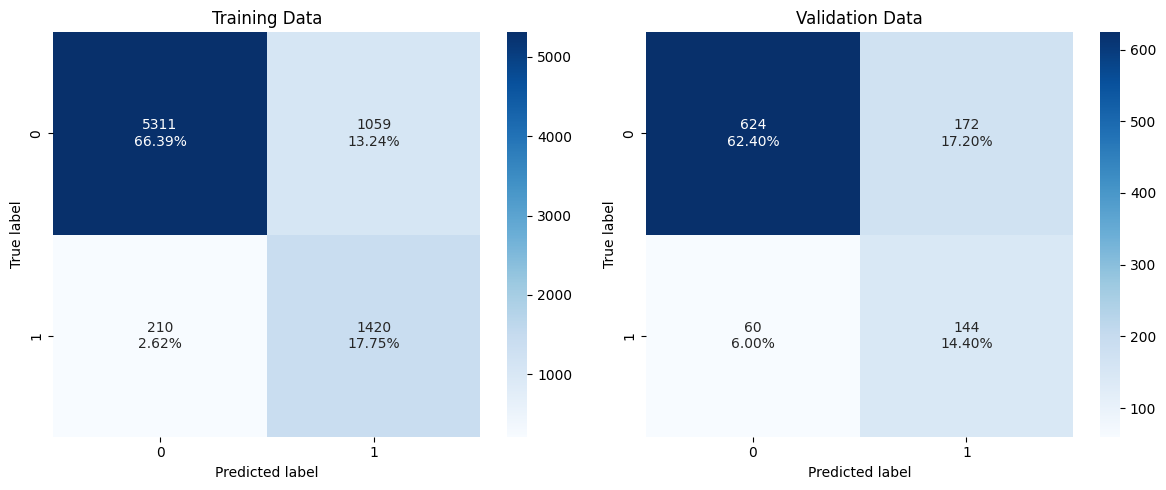

In [ ]:
#confusion matrices
confusion_matrix_train_val(model_2,X_train,y_train,X_val,y_val)

In [ ]:
results.loc[1] = [2,[64,16],["relu","relu"],50,32,"Adam","-","Class Weights","HE",history_2.history["loss"][-1],history_2.history["val_loss"][-1],history_2.history["recall"][-1],history_2.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 16]   
1                2                 [64, 16]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]        50          32       SGD   
1                        [relu, relu]        50          32      Adam   

  regularization  Balanced data Weights Initialization  train loss  \
0              -  Class Weights                     HE    0.443268   
1              -  Class Weights                     HE    0.353308   

   validation loss  train recall  validation recall  time (secs)  
0         0.506172      0.790798           0.779412        35.44  
1         0.500950      0.840491           0.705882        39.42

* The model shows worse results on validation set and looks overfitted - the difference between training and validation recall is rather big
* Training and Validation recalls start diverging right away during training

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()
model_3.add(InputLayer(shape=(X_train.shape[1],)))
model_3.add(Dense(64,activation="relu",kernel_initializer="he_normal"))
model_3.add(Dropout(0.4))
model_3.add(Dense(16,activation="relu",kernel_initializer="he_normal"))
model_3.add(Dropout(0.2))
model_3.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = optimizers.Adam()    # defining Adam as the optimizer to be used
model_3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])


In [ ]:
start = time.time()
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6836 - recall: 0.6247 - val_loss: 0.5581 - val_recall: 0.7157
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5995 - recall: 0.7247 - val_loss: 0.5123 - val_recall: 0.7206
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5737 - recall: 0.7130 - val_loss: 0.5121 - val_recall: 0.7549
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5493 - recall: 0.7483 - val_loss: 0.4954 - val_recall: 0.7304
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5409 - recall: 0.7417 - val_loss: 0.4969 - val_recall: 0.7353
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5322 - recall: 0.7298 - val_loss: 0.4885 - val_recall: 0.7451
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5206 - recall: 0.7563 - val_loss: 0.4770 - val_recall: 0.7402
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5219 - recall: 0.7519 - val_loss: 0.4840 - val_recall: 0.7353
Epoch 9/

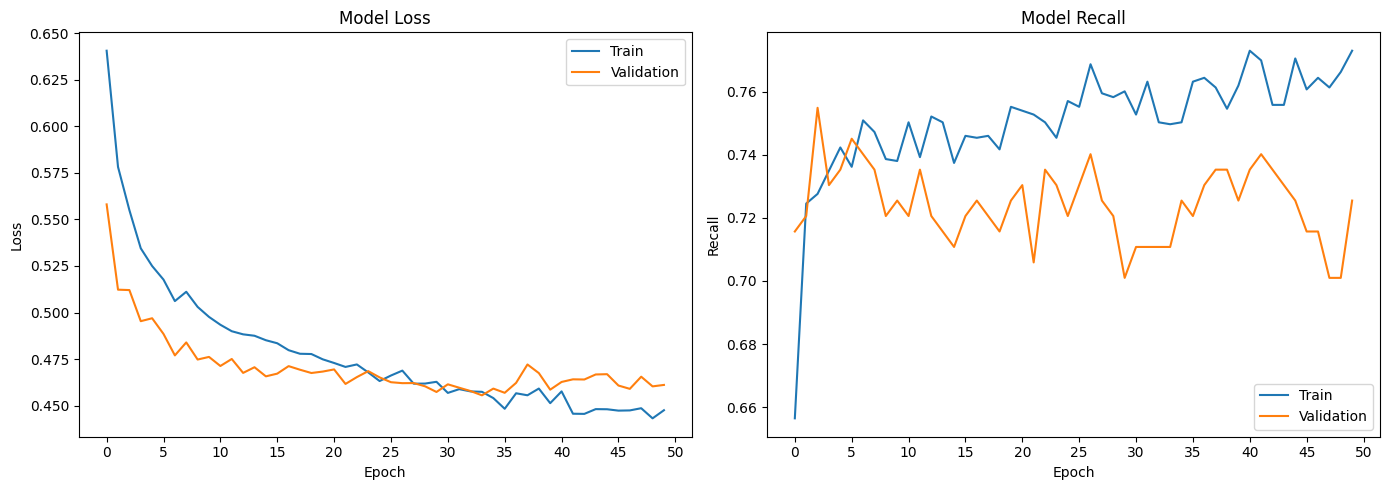

In [ ]:
plot_metrics(history_3)

In [ ]:
model3_perf=model_metrics_classification(model_3,X_train,y_train,X_val,y_val)
model3_perf

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy    Recall  Precision        F1
Training data    0.817125  0.785276   0.534893  0.636341
Validation data  0.794000  0.725490   0.496644  0.589641

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


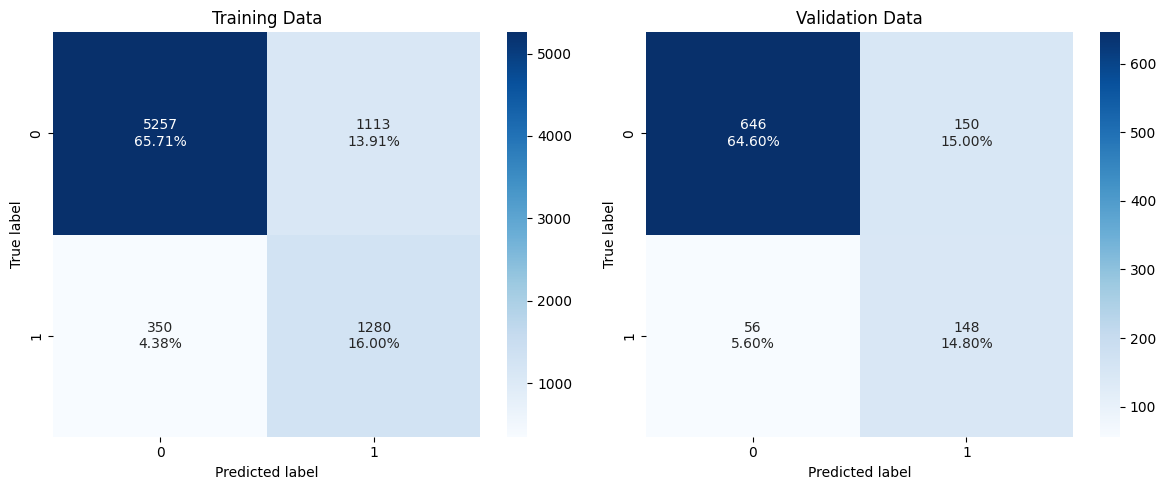

In [ ]:
#confusion matrices
confusion_matrix_train_val(model_3,X_train,y_train,X_val,y_val)

In [ ]:
results.loc[2] = [2,[64,16],["relu","relu"],50,32,"Adam","Dropout[0.4,0.2]","Class Weights","HE",history_3.history["loss"][-1],history_3.history["val_loss"][-1],history_3.history["recall"][-1],history_3.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 16]   
1                2                 [64, 16]   
2                2                 [64, 16]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]        50          32       SGD   
1                        [relu, relu]        50          32      Adam   
2                        [relu, relu]        50          32      Adam   

     regularization  Balanced data Weights Initialization  train loss  \
0                 -  Class Weights                     HE    0.443268   
1                 -  Class Weights                     HE    0.353308   
2  Dropout[0.4,0.2]  Class Weights                     HE    0.447578   

   validation loss  train recall  validation recall  time (secs)  
0         0.506172      0.790798           0.779412        35.44  
1         0.500950      0.840491           0.705882        39.42  
2         0.461157      0.773006           0.725490        40.16

* Using Dropout helps with reducing the overfit
* However, the results do not improve significantly, and the convergence is much less smooth

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.7, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('After OverSampling, the shape of X_train: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape))

After OverSampling, the shape of X_train: (10829, 22)
After OverSampling, the shape of y_train: (10829,) 



In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(InputLayer(shape=(X_train_over.shape[1],)))
model_4.add(Dense(64,activation="relu",kernel_initializer="he_normal"))
model_4.add(Dense(16,activation="relu",kernel_initializer="he_normal"))
model_4.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = optimizers.SGD()    # defining SGD as the optimizer to be used
model_4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])

In [ ]:
start = time.time()
history_4 = model_4.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6334 - recall: 0.4448 - val_loss: 0.5324 - val_recall: 0.4559
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5529 - recall: 0.5340 - val_loss: 0.4904 - val_recall: 0.5392
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5183 - recall: 0.6044 - val_loss: 0.4686 - val_recall: 0.5882
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4950 - recall: 0.6493 - val_loss: 0.4581 - val_recall: 0.6225
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4792 - recall: 0.6811 - val_loss: 0.4540 - val_recall: 0.6765
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4693 - recall: 0.7047 - val_loss: 0.4521 - val_recall: 0.6912
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4628 - recall: 0.7139 - val_loss: 0.4509 - val_recall: 0.7108
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4579 - recall: 0.7199 - val_loss: 0.4511 - val_recall: 0.7108
Epoch 9/

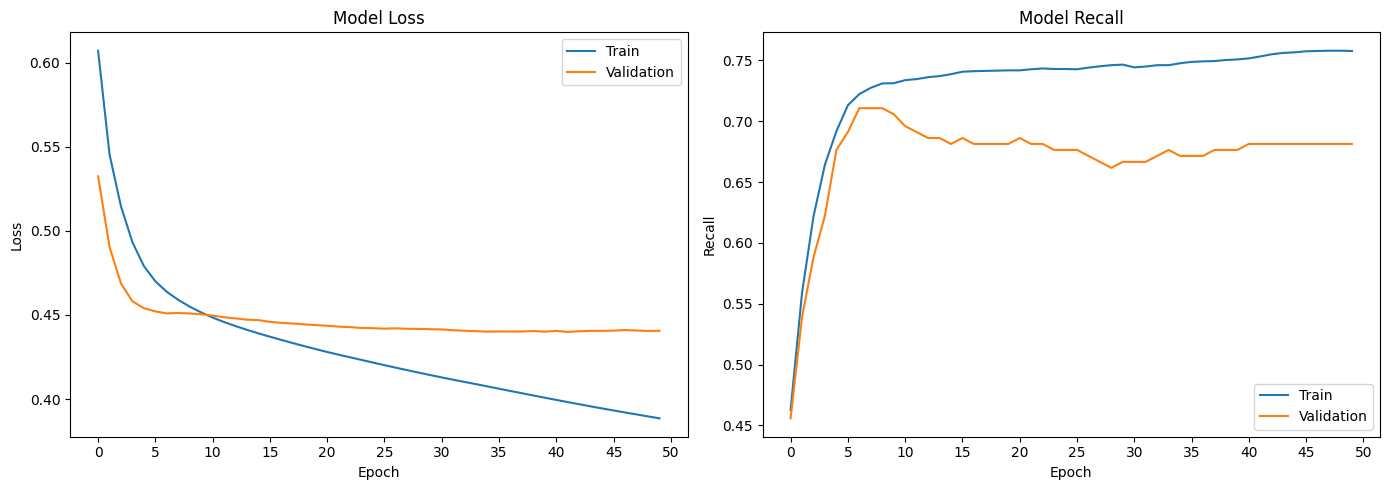

In [ ]:
plot_metrics(history_4)

In [ ]:
model4_perf=model_metrics_classification(model_4,X_train_over,y_train_over,X_val,y_val)
model4_perf

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Accuracy    Recall  Precision        F1
Training data    0.823991  0.781790   0.788866  0.785312
Validation data  0.809000  0.681373   0.524528  0.592751

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


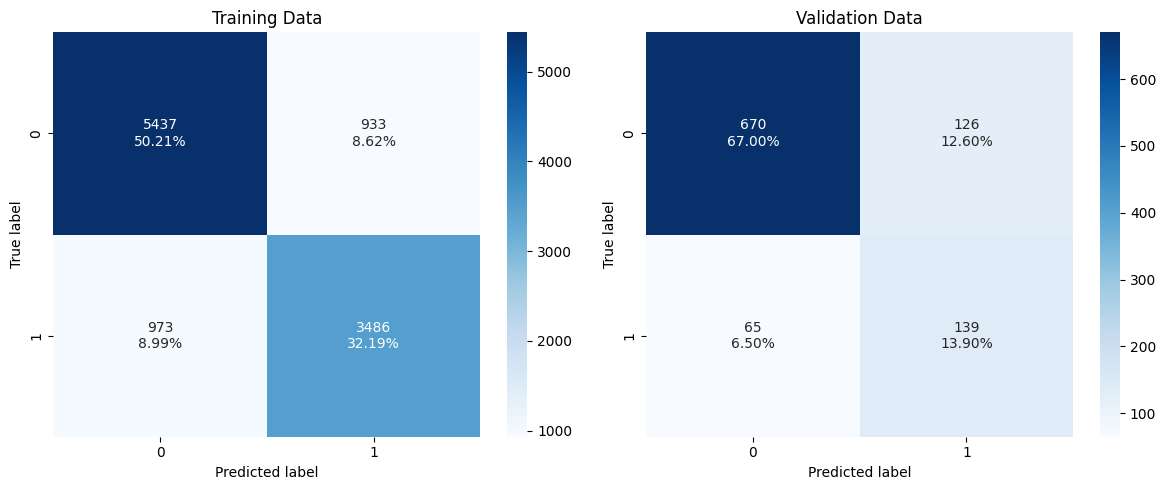

In [ ]:
#confusion matrices
confusion_matrix_train_val(model_4,X_train_over,y_train_over,X_val,y_val)

In [ ]:
results.loc[3] = [2,[64,16],["relu","relu"],50,32,"SGD","-","SMOTE","HE",history_4.history["loss"][-1],history_4.history["val_loss"][-1],history_4.history["recall"][-1],history_4.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 16]   
1                2                 [64, 16]   
2                2                 [64, 16]   
3                2                 [64, 16]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]        50          32       SGD   
1                        [relu, relu]        50          32      Adam   
2                        [relu, relu]        50          32      Adam   
3                        [relu, relu]        50          32       SGD   

     regularization  Balanced data Weights Initialization  train loss  \
0                 -  Class Weights                     HE    0.443268   
1                 -  Class Weights                     HE    0.353308   
2  Dropout[0.4,0.2]  Class Weights                     HE    0.447578   
3                 -          SMOTE                     HE    0.388554   

   validation loss  train recall  validation recall  time (secs)  
0         0.506172      0.790798           0.779412        35.44  
1         0.500950      0.840491           0.705882        39.42  
2         0.461157      0.773006           0.725490        40.16  
3         0.440585      0.757793           0.681373        38.86

* Using SMOTE shows smoother convergence and moderate degree of overfit
* However, the overall results are worse than the previous models

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_5 = Sequential()
model_5.add(InputLayer(shape=(X_train_over.shape[1],)))
model_5.add(Dense(64,activation="relu",kernel_initializer="he_normal"))
model_5.add(Dense(16,activation="relu",kernel_initializer="he_normal"))
model_5.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = optimizers.Adam()    # defining Adam as the optimizer to be used
model_5.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])

In [ ]:
start = time.time()
history_5 = model_5.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5657 - recall: 0.5309 - val_loss: 0.4314 - val_recall: 0.6569
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4534 - recall: 0.7145 - val_loss: 0.4263 - val_recall: 0.6765
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4351 - recall: 0.7214 - val_loss: 0.4222 - val_recall: 0.6667
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4235 - recall: 0.7295 - val_loss: 0.4190 - val_recall: 0.6667
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4145 - recall: 0.7320 - val_loss: 0.4186 - val_recall: 0.6667
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4060 - recall: 0.7347 - val_loss: 0.4188 - val_recall: 0.6667
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3980 - recall: 0.7430 - val_loss: 0.4187 - val_recall: 0.6667
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3905 - recall: 0.7525 - val_loss: 0.4217 - val_recall: 0.6716
Epoch 9/

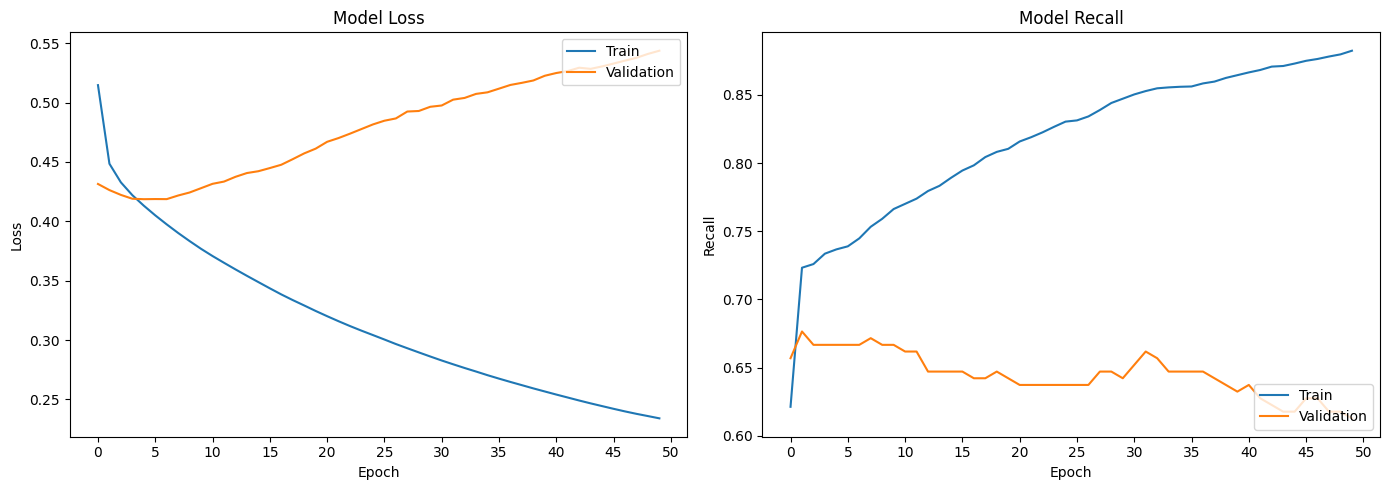

In [ ]:
plot_metrics(history_5)

In [ ]:
model5_perf=model_metrics_classification(model_5,X_train_over,y_train_over,X_val,y_val)
model5_perf

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Accuracy    Recall  Precision        F1
Training data    0.897682  0.926889   0.840895  0.881801
Validation data  0.773000  0.612745   0.457875  0.524109

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


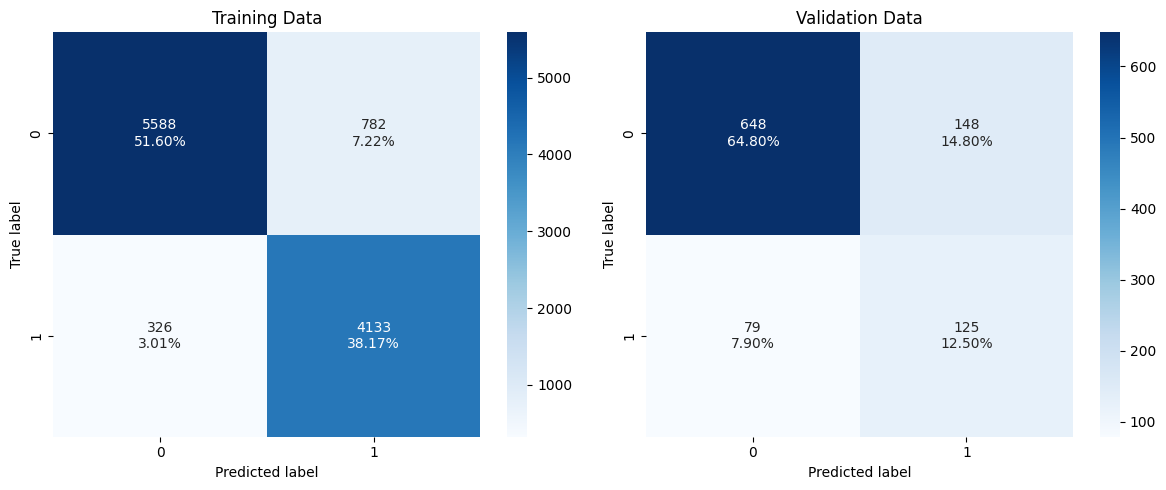

In [ ]:
confusion_matrix_train_val(model_5,X_train_over,y_train_over,X_val,y_val)

In [ ]:
results.loc[4] = [2,[64,16],["relu","relu"],50,32,"Adam","-","SMOTE","HE",history_5.history["loss"][-1],history_5.history["val_loss"][-1],history_5.history["recall"][-1],history_5.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 16]   
1                2                 [64, 16]   
2                2                 [64, 16]   
3                2                 [64, 16]   
4                2                 [64, 16]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]        50          32       SGD   
1                        [relu, relu]        50          32      Adam   
2                        [relu, relu]        50          32      Adam   
3                        [relu, relu]        50          32       SGD   
4                        [relu, relu]        50          32      Adam   

     regularization  Balanced data Weights Initialization  train loss  \
0                 -  Class Weights                     HE    0.443268   
1                 -  Class Weights                     HE    0.353308   
2  Dropout[0.4,0.2]  Class Weights                     HE    0.447578   
3                 -          SMOTE                     HE    0.388554   
4                 -          SMOTE                     HE    0.234133   

   validation loss  train recall  validation recall  time (secs)  
0         0.506172      0.790798           0.779412        35.44  
1         0.500950      0.840491           0.705882        39.42  
2         0.461157      0.773006           0.725490        40.16  
3         0.440585      0.757793           0.681373        38.86  
4         0.543632      0.882485           0.612745        54.30

* This model is largely overfit
* The validation Recall is the worse from all the models so far

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_6 = Sequential()
model_6.add(InputLayer(shape=(X_train_over.shape[1],)))
model_6.add(Dense(64,activation="relu",kernel_initializer="he_normal"))
model_6.add(Dropout(0.4))
model_6.add(Dense(16,activation="relu",kernel_initializer="he_normal"))
model_6.add(Dropout(0.2))
model_6.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = optimizers.Adam()    # defining Adam as the optimizer to be used
model_6.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])

In [ ]:
start = time.time()
history_6 = model_6.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6397 - recall: 0.4914 - val_loss: 0.4521 - val_recall: 0.6127
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5309 - recall: 0.6293 - val_loss: 0.4223 - val_recall: 0.6373
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5014 - recall: 0.6614 - val_loss: 0.4152 - val_recall: 0.6324
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4897 - recall: 0.6803 - val_loss: 0.4129 - val_recall: 0.6422
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4753 - recall: 0.6877 - val_loss: 0.4083 - val_recall: 0.6176
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4776 - recall: 0.6806 - val_loss: 0.4074 - val_recall: 0.6127
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4664 - recall: 0.6723 - val_loss: 0.4067 - val_recall: 0.6324
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4599 - recall: 0.6963 - val_loss: 0.4062 - val_recall: 0.6324
Epoch 9/

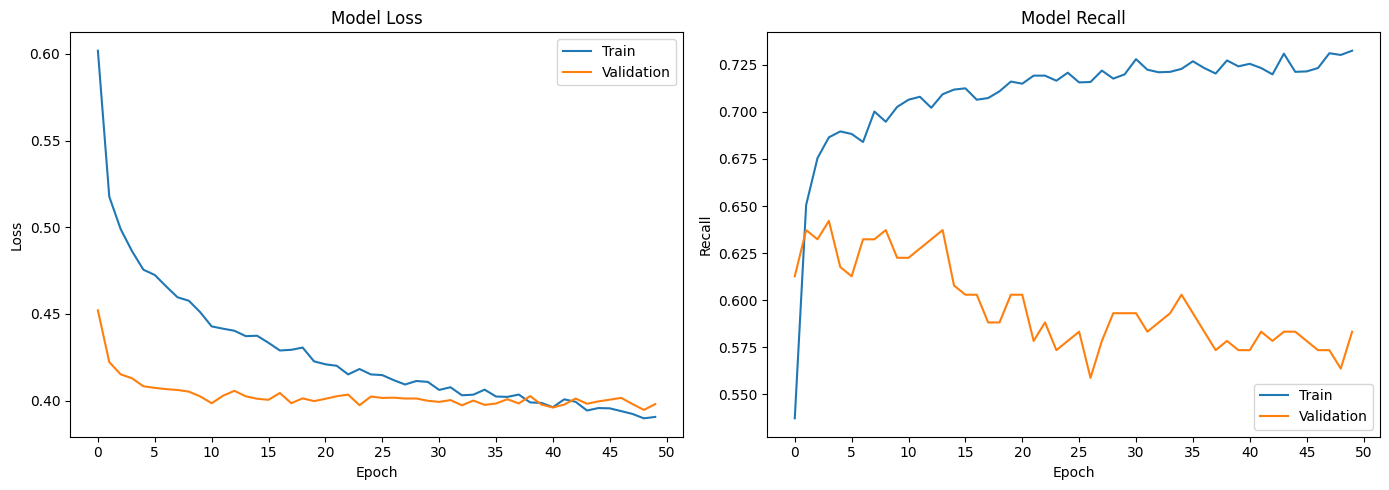

In [ ]:
plot_metrics(history_6)

In [ ]:
model6_perf=model_metrics_classification(model_6,X_train_over,y_train_over,X_val,y_val)
model6_perf

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Accuracy    Recall  Precision        F1
Training data    0.842183  0.736488   0.860136  0.793524
Validation data  0.834000  0.583333   0.595000  0.589109

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


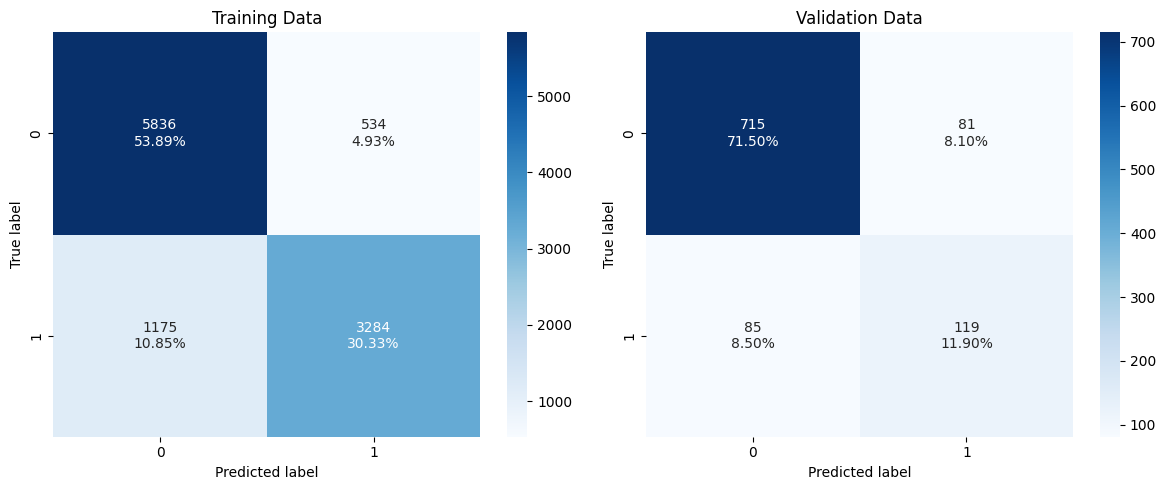

In [ ]:
confusion_matrix_train_val(model_6,X_train_over,y_train_over,X_val,y_val)

In [ ]:
results.loc[5] = [2,[64,16],["relu","relu"],50,32,"Adam","Dropout[0.4,0.2]","SMOTE","HE",history_6.history["loss"][-1],history_6.history["val_loss"][-1],history_6.history["recall"][-1],history_6.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 16]   
1                2                 [64, 16]   
2                2                 [64, 16]   
3                2                 [64, 16]   
4                2                 [64, 16]   
5                2                 [64, 16]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]        50          32       SGD   
1                        [relu, relu]        50          32      Adam   
2                        [relu, relu]        50          32      Adam   
3                        [relu, relu]        50          32       SGD   
4                        [relu, relu]        50          32      Adam   
5                        [relu, relu]        50          32      Adam   

     regularization  Balanced data Weights Initialization  train loss  \
0                 -  Class Weights                     HE    0.443268   
1                 -  Class Weights                     HE    0.353308   
2  Dropout[0.4,0.2]  Class Weights                     HE    0.447578   
3                 -          SMOTE                     HE    0.388554   
4                 -          SMOTE                     HE    0.234133   
5  Dropout[0.4,0.2]          SMOTE                     HE    0.390656   

   validation loss  train recall  validation recall  time (secs)  
0         0.506172      0.790798           0.779412        35.44  
1         0.500950      0.840491           0.705882        39.42  
2         0.461157      0.773006           0.725490        40.16  
3         0.440585      0.757793           0.681373        38.86  
4         0.543632      0.882485           0.612745        54.30  
5         0.398051      0.732451           0.583333        57.76

* This model shows lesser degree of overfit than the previous one, without Dropout
* However, the convergence is less smooth, and the overall results we got are the worst so far

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model1_perf.iloc[0,:].T,
        model2_perf.iloc[0,:].T,
        model3_perf.iloc[0,:].T,
        model4_perf.iloc[0,:].T,
        model5_perf.iloc[0,:].T,
        model6_perf.iloc[0,:].T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "NN (SGD and Class Weights)",
    "NN (Adam and Class Weights)",
    "NN (Adam, Dropout and Class Weights)",
    "NN (SGD and SMOTE)",
    "NN (Adam and SMOTE)",
    "NN (Adam, Dropout and SMOTE)"
]

In [ ]:
# training performance comparison

models_val_comp_df = pd.concat(
    [
        model1_perf.iloc[1,:].T,
        model2_perf.iloc[1,:].T,
        model3_perf.iloc[1,:].T,
        model4_perf.iloc[1,:].T,
        model5_perf.iloc[1,:].T,
        model6_perf.iloc[1,:].T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "NN (SGD and Class Weights)",
    "NN (Adam and Class Weights)",
    "NN (Adam, Dropout and Class Weights)",
    "NN (SGD and SMOTE)",
    "NN (Adam and SMOTE)",
    "NN (Adam, Dropout and SMOTE)"
]

In [ ]:
#Results on training dataset
models_train_comp_df

NN (SGD and Class Weights)  NN (Adam and Class Weights)  \
Accuracy                     0.775375                     0.841375   
Recall                       0.822699                     0.871166   
Precision                    0.470691                     0.572812   
F1                           0.598794                     0.691166   

           NN (Adam, Dropout and Class Weights)  NN (SGD and SMOTE)  \
Accuracy                               0.817125            0.823991   
Recall                                 0.785276            0.781790   
Precision                              0.534893            0.788866   
F1                                     0.636341            0.785312   

           NN (Adam and SMOTE)  NN (Adam, Dropout and SMOTE)  
Accuracy              0.897682                      0.842183  
Recall                0.926889                      0.736488  
Precision             0.840895                      0.860136  
F1                    0.881801                      0.793524

In [ ]:
# Results on validation dataset
models_val_comp_df

NN (SGD and Class Weights)  NN (Adam and Class Weights)  \
Accuracy                     0.761000                     0.768000   
Recall                       0.779412                     0.705882   
Precision                    0.450425                     0.455696   
F1                           0.570916                     0.553846   

           NN (Adam, Dropout and Class Weights)  NN (SGD and SMOTE)  \
Accuracy                               0.794000            0.809000   
Recall                                 0.725490            0.681373   
Precision                              0.496644            0.524528   
F1                                     0.589641            0.592751   

           NN (Adam and SMOTE)  NN (Adam, Dropout and SMOTE)  
Accuracy              0.773000                      0.834000  
Recall                0.612745                      0.583333  
Precision             0.457875                      0.595000  
F1                    0.524109                      0.589109

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                2                 [64, 16]   
1                2                 [64, 16]   
2                2                 [64, 16]   
3                2                 [64, 16]   
4                2                 [64, 16]   
5                2                 [64, 16]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                        [relu, relu]        50          32       SGD   
1                        [relu, relu]        50          32      Adam   
2                        [relu, relu]        50          32      Adam   
3                        [relu, relu]        50          32       SGD   
4                        [relu, relu]        50          32      Adam   
5                        [relu, relu]        50          32      Adam   

     regularization  Balanced data Weights Initialization  train loss  \
0                 -  Class Weights                     HE    0.443268   
1                 -  Class Weights                     HE    0.353308   
2  Dropout[0.4,0.2]  Class Weights                     HE    0.447578   
3                 -          SMOTE                     HE    0.388554   
4                 -          SMOTE                     HE    0.234133   
5  Dropout[0.4,0.2]          SMOTE                     HE    0.390656   

   validation loss  train recall  validation recall  time (secs)  
0         0.506172      0.790798           0.779412        35.44  
1         0.500950      0.840491           0.705882        39.42  
2         0.461157      0.773006           0.725490        40.16  
3         0.440585      0.757793           0.681373        38.86  
4         0.543632      0.882485           0.612745        54.30  
5         0.398051      0.732451           0.583333        57.76

* We got the best Recall on the Validation set with model using SGD optimizer and Class Weights.
* That model also looks the least overfit.
* I will be choosing the model with SGD and Class Weights

* Let's check the performance of the selected model on the test dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
final_model = Sequential()
final_model.add(InputLayer(shape=(X_train.shape[1],)))
final_model.add(Dense(64,activation="relu",kernel_initializer="he_normal"))
final_model.add(Dense(16,activation="relu",kernel_initializer="he_normal"))
final_model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = optimizers.SGD()    # defining SGD as the optimizer to be used
final_model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["recall"])

In [ ]:
start = time.time()
final_history = final_model.fit(X_train, y_train, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end=time.time()

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6615 - recall: 0.6460 - val_loss: 0.6284 - val_recall: 0.6029
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6059 - recall: 0.7038 - val_loss: 0.5881 - val_recall: 0.6667
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5795 - recall: 0.7102 - val_loss: 0.5629 - val_recall: 0.6912
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5603 - recall: 0.7419 - val_loss: 0.5483 - val_recall: 0.7304
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5461 - recall: 0.7607 - val_loss: 0.5386 - val_recall: 0.7696
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5353 - recall: 0.7645 - val_loss: 0.5312 - val_recall: 0.7647
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5271 - recall: 0.7716 - val_loss: 0.5272 - val_recall: 0.7647
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5208 - recall: 0.7738 - val_loss: 0.5250 - val_recall: 0.7549
Epoch 9/

In [ ]:
model_performance_classification_sklearn(final_model,X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision        F1
0     0.759  0.793103   0.447222  0.571936

* We got 79 Recall on the test set, which is even a bit higher than on the Validation, so the model generalites pretty well

## Actionable Insights and Business Recommendations

- The final model can be used with the reasonable degree of accuracy to identify the clients who will potentially churn.
- From the Geographical point we saw that German clients show an increased churn rate. It makes sense to analyze that group further to try and identify the factors that influence the decision to leave the bank and potentially initiate some campaigns targeted to German clients
- From the EDA we also saw that clients having only 1 product with the bank churn more - so it makes sense to target that group of clients and try selling them additional products.
- Special attention should also be paid to older clients (>~38 years) - older clients show more churn. Especially if those clients also only have 1 product, and/or are not active with the bank - the bank should engage them to decrease the risk of churn.
- Additional optimizations can be tried with the modeling to see if the results can be further improved - trying different architecture for the neural network, trying other optimizers (for example, SGD with momentum), maybe trying batch normalization



In [ ]:
%%shell
jupyter nbconvert --to html '/content/INN_Learner_Notebook_Full_code_Antonova.ipynb'

[NbConvertApp] Converting notebook /content/INN_Learner_Notebook_Full_code_Antonova.ipynb to html
[NbConvertApp] Writing 4902017 bytes to /content/INN_Learner_Notebook_Full_code_Antonova.html
